  <h1 style="color: #00E676;">Cars 4 You - Machine Learning Projects</h1>

Group: 39
- **Name**: Afonso Pereira **number**: 20250342
- **Name**: Daniel Ribeiro, **number**: 20250376
- **Name**: Pedro Rei, **number**: 20250389
- **Name**: Tomás Boavista, **number**: 20250496

# Group member contirbution

# Abstract

# 1. Identifying Business Needs

This project addresses a machine learning problem within the context of Cars 4 You, a fictional online car resale company that operates in the automotive sales industry across multiple brands. The company's business model relies on a two-stage vehicle evaluation process where sellers submit vehicle specifications on the online platform, followed by further physical inspection conducted by the company's mechanical team in order to sell . While this approach has enabled accurate pricing and quality control, the company now faces operational scalability challenges as increasing demand has resulted in extended waiting periods for inspections, potentially affecting customer retention.

The central problem investigated in this project is whether machine learning techniques can provide accurate price predictions based on vehicle specifications submitted by users, thereby reducing the dependency on manual inspections for price estimates. This represents a task where the objective is to predict a continuous target variable (vehicle price) from a set of input features describing vehicle characteristics.

The project is structured around three primary objectives. The first objective involves regression benchmarking, wherein multiple algorithms are implemented, trained, and systematically compared using an evaluation framework to identify the models that demonstrate the strongest generalization performance. The second objective focuses on model optimization through hyperparameter tuning, feature engineering, and preprocessing refinements to maximize predictive accuracy while avoiding overfitting. The third objective encompasses open-ended exploratory analysis aimed at generating insights beyond standard model development, such as feature importance analysis, ablation studies examining individual pipeline components, comparison of generalized versus segment-specific modeling approaches, or development of deployment-ready prediction systems.

---------------------------------Explaining CVV USAGE -----------------------------------------

# 2. Data Exploration and Preprocessing

  <h2 style="color: #00E676;">Imported Libraries</h2>

In [1]:
#!pip install rapidfuzz

In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
import re
import unicodedata

# Visualization utilities
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# To clean data with text similarity
from rapidfuzz import process, fuzz

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature selection
from sklearn.feature_selection import RFE

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Model assessment
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

All libraries required for data exploration, preprocessing, model training and evaluation were imported at the beginning of the notebook to ensure reproducibility and clarity.

The project relies exclusively on **scikit-learn**, in accordance with the project guidelines, and includes:
- Libraries for data manipulation and visualization (NumPy, Pandas, Matplotlib, Seaborn);
- Preprocessing tools for handling missing values, scaling numerical variables and encoding categorical features;
- Model assessment utilities to implement a **Cross-Validation-based evaluation strategy**, which is used consistently throughout the project;
- A set of regression algorithms covered in class (Linear Regression, KNN, Decision Trees, Random Forests, SVR and MLP), enabling a fair benchmarking process.

No automated machine learning frameworks or external gradient boosting libraries were used, ensuring full compliance with the project constraints.


  <h2 style="color: #00E676;">Import Datasets</h2>

In [159]:
df_train = pd.read_csv("data/train.csv")
print(f"The dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")

The dataset has 75973 rows and 14 columns


In [160]:
df_test = pd.read_csv("data/test.csv")
print(f"The dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns")

The dataset has 32567 rows and 13 columns


<table style="width:100%; font-size:12px; border-collapse: collapse;">
  <thead>
    <tr style="background-color:#f2f2f2; text-align:left;">
      <th style="border:1px solid #ddd;">Variable</th>
      <th style="border:1px solid #ddd;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="border:1px solid #ddd;">carID </td><td style="border:1px solid #ddd;">An attribute that contains an identifier for each car</td></tr>
    <tr><td style="border:1px solid #ddd;">Brand</td><td style="border:1px solid #ddd;">The car’s main brand (e.g. Ford, Toyota)</td></tr>
    <tr><td style="border:1px solid #ddd;">model</td><td style="border:1px solid #ddd;">The car model</td></tr>
    <tr><td style="border:1px solid #ddd;">year</td><td style="border:1px solid #ddd;">The year of Registration of the Car</td></tr>
    <tr><td style="border:1px solid #ddd;">mileage</td><td style="border:1px solid #ddd;">The total reported distance travelled by the car (in miles)</td></tr>
    <tr><td style="border:1px solid #ddd;">tax</td><td style="border:1px solid #ddd;">The amount of road tax (in £) that, in 2020, was
applicable to the car in question.</td></tr>
    <tr><td style="border:1px solid #ddd;">fuelType</td><td style="border:1px solid #ddd;">Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)</td></tr>
    <tr><td style="border:1px solid #ddd;">mpg</td><td style="border:1px solid #ddd;">Average Miles per Gallon</td></tr>
    <tr><td style="border:1px solid #ddd;">engineSize</td><td style="border:1px solid #ddd;">Size of Engine in liters (Cubic Decimeters)</td></tr>
    <tr><td style="border:1px solid #ddd;">paintQuality%</td><td style="border:1px solid #ddd;">The mechanic’s assessment of the cars’ overall paint
quality and hull integrity (filled by the mechanic during evaluation).</td></tr>
    <tr><td style="border:1px solid #ddd;">previousOwners</td><td style="border:1px solid #ddd;">Number of previous registered owners of the vehicle.</td></tr>
    <tr><td style="border:1px solid #ddd;">hasDamage</td><td style="border:1px solid #ddd;">Boolean marker filled by the seller at the time of
registration stating whether the car is damaged or not.</td></tr>
    <tr><td style="border:1px solid #ddd;">price</td><td style="border:1px solid #ddd;">The car’s price when purchased by Cars 4 You (in £).</td></tr>
  </tbody>
</table>

The datasets provided by Cars 4 You were loaded separately into training and test sets.  
The training dataset contains 75,973 observations and includes the target variable `price`, while the test dataset contains 32,567 observations and does not include the target, as expected in the Kaggle evaluation setup.

At this stage, no preprocessing or transformations were applied. The goal of this step is solely to confirm data integrity and dimensionality before proceeding to data exploration and cleaning.

It is important to note that some variables require special consideration with respect to the project’s business objective. In particular, `paintQuality%` is assessed by a mechanic during inspection and is therefore not available at prediction time, when the user submits the car information online. For this reason, this variable is not used in the final predictive models, ensuring consistency with the intended deployment scenario.

Additionally, `carID` is a unique identifier and does not carry predictive information, and is therefore excluded from the modeling process.


  <h2 style="color: #00E676;">1. Initial Data Inspection</h2>

In [161]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [162]:
df_test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [163]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


An initial inspection of both the training and test datasets was performed to understand their structure, variable types and potential data quality issues.

By examining the first observations of each dataset, allowed for an early identification of potentially inconsistent or unrealistic values, such as negative mileage, non-integer values for the registration year, and invalid entries in categorical variables, which are addressed in subsequent preprocessing steps.

The dataset information summary highlights a mix of numerical and categorical variables, as well as the presence of missing values across several features. 

In [164]:
pct_missing = (df_train.isna().mean() * 100).round(2)
pct_missing_str = pct_missing.map(lambda x: f"{x:.2f}%")
pct_missing_str

carID              0.00%
Brand              2.00%
model              2.00%
year               1.96%
price              0.00%
transmission       2.00%
mileage            1.93%
fuelType           1.99%
tax               10.40%
mpg               10.43%
engineSize         2.00%
paintQuality%      2.01%
previousOwners     2.04%
hasDamage          2.04%
dtype: object

The results show that most variables contain a small proportion of missing values (around 2%), while `tax` and `mpg` present a higher missing rate (approximately 10%). These differences motivate the use of feature-specific imputation strategies, which are defined later in the preprocessing stage and applied exclusively within the training folds during Cross-Validation.

In [165]:
df_train.duplicated().sum()

np.int64(0)

In [166]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


After the initial data inspection, we verified that there are no duplicate rows in the training dataset. Additionally, we confirmed the data types of all variables and identified the categorical features that will require appropriate encoding in later stages of the pipeline.

Based on the statistical summary of the numerical variables, several inconsistencies were identified. In the `year` column, values exceeding 2020 (the reference year of the dataset) were observed, as well as unusually low values relative to the interquartile range, indicating the presence of potential outliers.

Additionally, multiple variables exhibit values that are inconsistent with their real-world interpretation, including negative values in `mileage`, `tax`, `mpg`, `engineSize`, and `previousOwners`. These issues suggest data quality problems rather than genuine extreme observations and motivate the need for targeted data cleaning strategies, which are addressed in the preprocessing stage.

Finally, the `hasDamage` variable shows no variability in the available data, taking only a single observed value or missing entries. This lack of variability is noted at this stage and is taken into account in subsequent feature selection decisions.


 <h3 style="color: #00E676;">1.1 Negative and Null Observations</h3>

In [167]:
col = {
    "mileage < 0":         df_train["mileage"] < 0,
    "mpg < 0":             df_train["mpg"] < 0,
    "tax < 0":             df_train["tax"] < 0,
    "previousOwners < 0":  df_train["previousOwners"] < 0,
    "engineSize < 0":      df_train["engineSize"] < 0,
}

for label, mask in col.items():
    col = label.split()[0]
    display(Markdown(f"The number of observations that are negative in **`{col}`** is **{int(mask.sum())}**."))

The number of observations that are negative in **`mileage`** is **369**.

The number of observations that are negative in **`mpg`** is **36**.

The number of observations that are negative in **`tax`** is **378**.

The number of observations that are negative in **`previousOwners`** is **371**.

The number of observations that are negative in **`engineSize`** is **84**.

 <h4 style="color: #00E676;"> 1.1.1 Mileage</h4>

In [168]:
df_train.loc[df_train["mileage"] < 0].sort_values("mileage")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
843,7845,BMW,3 Series,2019.0,23498,Semi-Auto,-58540.574478,Diesel,145.0,54.3,2.0,38.0,NaN,0.0
1580,9246,BMW,2 Series,2019.0,24450,Manual,-58540.574478,Diesel,145.0,60.1,2.0,78.0,4.0,0.0
8673,13710,BMW,M3,2004.0,17850,Manual,-58540.574478,Petrol,325.0,23.3,3.2,68.0,1.0,0.0
11088,11313,BMW,X3,2015.0,12250,Automatic,-58540.574478,Diesel,NaN,54.3,2.0,43.0,3.0,0.0
12607,9058,BMW,2 Series,2019.0,23450,Semi-Auto,-58540.574478,Petrol,150.0,48.7,1.5,93.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57208,34401,Hyundai,I10,2019.0,8590,Manual,-36635.042697,Petrol,150.0,60.1,1.0,42.0,2.0,0.0
54200,33436,Hyundai,Tucson,2019.0,21490,Manual,-36635.042697,Petrol,145.0,34.9,1.6,56.0,3.0,0.0
16311,31434,Hyundai,I20,2018.0,8980,Manual,-36635.042697,Petrol,145.0,55.4,1.2,61.0,3.0,0.0
20141,34786,Hyundai,I800,2019.0,18490,Manual,-36635.042697,diesel,150.0,31.7,2.5,39.0,2.0,0.0


In [169]:
df_train.loc[df_train["mileage"] < 0, "mileage"].mean()

np.float64(-47040.576642624925)

In [170]:
df_train.loc[df_train["mileage"] > 0, "mileage"].sort_values()

70608         1.0
30601         1.0
37684         1.0
15119         1.0
72152         1.0
           ...   
33484    241565.0
45843    250650.0
55413    259000.0
4840     300000.0
6658     323000.0
Name: mileage, Length: 74141, dtype: float64

It was considered whether the negative mileage values could correspond to simple sign errors. However, a closer inspection shows that these observations are well beyond the range of valid mileage values, with magnitudes substantially larger than the maximum observed positive mileage. This strongly suggests that they do not represent plausible real-world measurements.

For this reason, these values are treated as invalid observations. In the preprocessing stage, negative mileage values will be flagged as missing and handled accordingly using an imputation strategy defined within the Cross-Validation framework, ensuring that no information leakage is introduced.

<h4 style="color: #00E676;">1.1.2. mpg</h4>

In [171]:
df_train.loc[df_train["mpg"] < 0].sort_values("mpg")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
758,13396,BMW,X1,2019.0,25480,Semi-Auto,5163.000000,Petrol,145.000000,-43.421768,2.0,86.0,1.0,0.0
2545,14934,BMW,3 Series,2019.0,29500,Automatic,3185.000000,Petrol,145.000000,-43.421768,2.0,97.0,3.0,0.0
5156,14127,BMW,2 Series,2020.0,32450,Semi-Auto,1118.000000,Diesel,145.000000,-43.421768,2.0,37.0,1.0,0.0
6306,14420,BMW,2 Series,2015.0,17799,Automatic,38902.000000,Petrol,260.000000,-43.421768,3.0,33.0,4.0,0.0
7454,12400,BMW,X5,2016.0,26995,Automatic,46126.000000,Diesel,200.000000,-43.421768,3.0,77.0,2.0,0.0
7577,14603,BMW,2 Series,2015.0,17541,Semi-Auto,26035.000000,Petrol,165.000000,-43.421768,2.0,75.0,3.0,0.0
9800,11181,BMW,1 Series,2019.0,19298,Semi-Auto,10040.000000,Diesel,145.000000,-43.421768,2.0,70.0,3.0,0.0
10107,7781,BMW,3 Series,2017.0,14800,Manual,29968.000000,DIESEL,30.000000,-43.421768,2.0,52.0,1.0,0.0
10381,9202,BMW,X1,2016.0,17000,Automatic,46968.000000,Diesel,125.000000,-43.421768,2.0,82.0,0.0,0.0
11235,10214,BMW,3 Series,2014.0,14500,Automatic,45140.000000,Diesel,125.000000,-43.421768,3.0,77.0,2.0,0.0


In [172]:
df_test.loc[df_test["mpg"] < 0].sort_values("mpg")

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
4566,79461,BMW,5 Series,2016.0,Automatic,83189.000000,Diesel,20.000000,-43.421768,2.000000,68.0,2.0,0.0
4625,81976,BMW,3 Series,2019.0,Semi-Auto,6000.000000,Diesel,145.000000,-43.421768,3.822758,86.0,1.0,0.0
7630,80175,BMW,X1,2016.0,Manual,-58540.574478,Diesel,20.000000,-43.421768,2.000000,32.0,0.0,0.0
7734,80445,BMW,1 Series,2015.0,Manual,46000.000000,Petrol,125.000000,-43.421768,1.500000,54.0,0.0,0.0
8498,79366,BMW,X3,2015.0,Semi-Auto,44126.000000,Diesel,200.000000,-43.421768,3.000000,79.0,3.0,0.0
8949,82248,BMW,5 Series,2019.0,Semi-Auto,5130.000000,Diesel,145.000000,-43.421768,2.000000,41.0,4.0,0.0
9421,80677,BMW,1 Series,2015.0,Semi-Auto,46242.000000,DIESEL,30.000000,-43.421768,2.000000,74.0,0.0,0.0
10139,79287,BMW,3 Series,2019.0,Semi-Auto,23000.000000,PETROL,150.000000,-43.421768,2.000000,41.0,2.0,0.0
10532,82168,BMW,3 Series,2016.0,Manual,27796.000000,Petrol,205.000000,-43.421768,2.000000,97.0,2.0,0.0
11586,80535,BMW,5 Series,2017.0,Semi-Auto,20279.000000,NaN,135.000000,-43.421768,2.000000,91.0,3.0,0.0


An inspection of the observations with negative `mpg` values reveals that these values are identical across multiple records, indicating a systematic data recording issue rather than random measurement noise.

This pattern is consistently observed in both the training and test datasets, where all negative `mpg` values areassociated with a specific subset of vehicles. While the issue appears to affect a specific subset of the data, negative fuel efficiency values are not physically meaningful and therefore cannot be interpreted as valid measurements.

For this reason, negative `mpg` values are considered invalid observations. In the preprocessing stage, these values will be imputed using the median `mpg` computed for the corresponding vehicle model, ensuring that the imputed values remain consistent with the characteristics of similar cars.

<h4 style="color: #00E676;">1.1.3 Tax</h4>

In [173]:
df_train.loc[df_train["tax"] < 0].sort_values("tax")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
6844,51855,Toyota,Aygo,2014.0,4495,Manual,19658.0,Petrol,-91.121630,65.700000,1.0,70.0,1.0,0.0
11343,55047,Toyota,Aygo,2016.0,6250,Manual,24125.0,Petrol,-91.121630,69.000000,1.0,62.0,2.0,0.0
11052,54940,Toyota,Aygo,2018.0,8700,Manual,4346.0,petrol,-91.121630,68.900000,1.0,49.0,4.0,0.0
8218,53344,Toyota,Aygo,2017.0,8903,Semi-Auto,21034.0,Petrol,-91.121630,67.300000,1.0,60.0,0.0,0.0
51205,52434,Toyota,C-HR,2019.0,23688,Automatic,9651.0,ybrid,-91.121630,74.300000,1.8,52.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44697,50339,Skoda,Yeti Outdoor,2016.0,11995,MANUA,30076.0,Diesel,-18.330743,20.710095,2.0,57.0,4.0,0.0
11572,47678,Skoda,Superb,2019.0,28995,Semi-Auto,3245.0,Petrol,-18.330743,39.200000,NaN,49.0,2.0,0.0
25821,49859,koda,Citigo,2018.0,7498,Manual,11726.0,Petrol,-18.330743,64.200000,1.0,45.0,2.0,0.0
58025,50582,Skoda,Superb,2017.0,16850,Semi-Auto,29103.0,Diesel,-18.330743,58.900000,2.0,62.0,1.0,0.0


In [174]:
df_train.loc[df_train["tax"] < 0, "tax"].mean()

np.float64(-46.247839841541534)

In [175]:
df_train.loc[df_train["tax"] > 0, "tax"].mean()

np.float64(129.52551904738263)

An inspection of the negative values in the `tax` variable shows that their magnitudes are relatively small when compared to the distribution of valid tax values. When considering their absolute values, these observations fall within the typical range observed for positive tax amounts.

This pattern suggests that these cases are likely the result of sign-related data entry issues rather than genuinely extreme or anomalous tax values. In the preprocessing stage, negative `tax` values will therefore be treated as sign errors and corrected accordingly, ensuring consistency with the expected interpretation of this variable.

<h4 style="color: #00E676;">1.1.4 previousOwners</h4>

In [176]:
df_train.loc[df_train["previousOwners"] < 0].sort_values("previousOwners")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
126,71677,VW,Tiguan,2019.0,29999,Semi-Auto,669.000000,Diesel,145.0,39.8,2.0,42.0,-2.345650,0.0
2086,71064,VW,Passat,2014.0,5394,Manual,134000.000000,Diesel,30.0,61.4,2.0,36.0,-2.345650,0.0
75451,75599,VW,Up,2015.0,6795,Manual,10800.000000,Petrol,20.0,61.4,1.0,31.0,-2.345650,0.0
1631,69065,VW,Polo,2017.0,9698,Manual,32233.000000,Petrol,20.0,60.1,1.2,97.0,-2.345650,0.0
11922,75549,VW,Golf SV,2016.0,11987,Automatic,-48190.655673,etrol,30.0,54.3,1.4,59.0,-2.345650,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,59929,Opel,Grandland X,2019.0,17050,Manual,-42707.564215,petrol,145.0,NaN,1.2,96.0,-2.299439,0.0
14168,60414,Opel,Meriva,2014.0,5595,Manual,45700.000000,Petrol,145.0,47.1,1.4,66.0,-2.299439,0.0
62665,59696,Opel,Astra,2015.0,7495,unknown,27650.000000,NaN,200.0,42.8,1.4,64.0,-2.299439,0.0
46848,61570,Opel,Mokka X,2019.0,14750,Manual,7931.000000,Petrol,145.0,39.2,1.4,32.0,-2.299439,0.0


In [177]:
df_train.loc[df_train["previousOwners"] > 0, "previousOwners"].mean()

np.float64(2.523242064259399)

In [178]:
df_train.loc[df_train["previousOwners"] < 0, "previousOwners"].mean()

np.float64(-2.332038800582199)

In [179]:
previousOwners_n = pd.to_numeric(df_train["previousOwners"], errors="coerce")
decimal = previousOwners_n.notna() & (previousOwners_n % 1 != 0)

decimal.sum()

np.int64(734)

An inspection of the `previousOwners` variable reveals the presence of negative values, as well as non-integer observations. Given the nature of this variable, both negative values and fractional numbers are not meaningful in a real-world context.

The comparison between the distributions of positive and negative values shows similar average magnitudes, suggesting that negative values are likely the result of sign-related data entry issues rather than genuinely anomalous cases. Additionally, the presence of decimal values indicates inconsistencies in how this variable was recorded.

In the preprocessing stage, negative values in `previousOwners` will be treated as sign errors and corrected accordingly, while non-integer values will be rounded to the nearest whole number to ensure consistency with the expected interpretation of this feature.

<h4 style="color: #00E676;">1.1.5 EngineSize</h4>

In [180]:
df_train.loc[df_train["engineSize"] < 0].sort_values("engineSize")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
443,24113,Ford,Kuga,NaN,14950,Manual,13411.0,Diesel,125.0,60.1,-0.103493,83.0,1.0,0.0
2416,21499,Ford,Focus,2019.0,17999,Automatic,2594.0,Diesel,145.0,67.3,-0.103493,69.0,2.0,0.0
2506,20280,Ford,Focus,2017.0,10500,Manua,33511.0,Petrol,NaN,NaN,-0.103493,71.0,0.0,0.0
2867,24953,For,Focus,2019.0,17990,Manual,2972.0,Petrol,NaN,NaN,-0.103493,84.0,4.0,0.0
3125,26087,Ford,Fiesta,2017.0,9597,Manual,19611.0,Petrol,0.0,65.7,-0.103493,31.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72493,22625,Ford,Focus,2018.0,11300,Manual,16617.0,Petrol,NaN,NaN,-0.103493,93.0,4.0,0.0
73524,30930,Ford,Focus,2015.0,7698,Manual,51060.0,DIESEL,20.0,67.3,-0.103493,77.0,3.0,NaN
74020,23291,Ford,Fiesta,2015.0,7240,Manual,21036.0,Petrol,125.0,54.3,-0.103493,84.0,1.0,0.0
74769,29430,Ford,Galaxy,2016.0,14900,Automatic,66015.0,Diese,150.0,52.3,-0.103493,79.0,4.0,0.0


In [181]:
eng_neg = pd.to_numeric(df_train["engineSize"], errors="coerce") < 0
df_train.loc[eng_neg, "Brand"].value_counts(dropna=False)

Brand
Ford    71
For      4
FORD     3
NaN      2
ord      2
ORD      1
ford     1
Name: count, dtype: int64

In [182]:
eng_neg = pd.to_numeric(df_test["engineSize"], errors="coerce") < 0
df_test.loc[eng_neg, "Brand"].value_counts(dropna=False)

Brand
Ford    29
ford     3
FORD     1
Name: count, dtype: int64

In [183]:
df_test.loc[df_test["engineSize"] < 0].sort_values("engineSize")

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
387,86916,Ford,Fiesta,2017.000000,Manual,32320.0,Petrol,0.0,65.7,-0.103493,54.000000,2.0,0.0
2241,87653,FORD,Mondeo,2016.000000,Manual,75309.0,Diesel,30.0,NaN,-0.103493,68.000000,1.0,0.0
2508,84976,Ford,Focus,2019.000000,Manua,10000.0,Petrol,145.0,46.3,-0.103493,68.000000,1.0,0.0
5874,86234,Ford,Focus,2017.000000,Manual,40096.0,Diesel,0.0,74.3,-0.103493,77.000000,2.0,0.0
7143,86621,Ford,Kuga,2019.000000,Manual,6888.0,Diesel,145.0,38.2,-0.103493,93.000000,2.0,0.0
8595,85746,Ford,Kuga,2018.000000,Manual,7796.0,NaN,145.0,54.3,-0.103493,61.000000,1.0,0.0
9082,85059,Ford,Focus,2015.000000,Manual,18741.0,NaN,NaN,NaN,-0.103493,42.000000,1.0,0.0
13848,87744,Ford,focus,2017.000000,Semi-Auto,11882.0,Diesel,NaN,NaN,-0.103493,66.000000,1.0,0.0
15065,84468,Ford,Fiesta,2017.000000,Manual,29533.0,PETROL,20.0,62.8,-0.103493,66.000000,2.0,0.0
15239,84264,Ford,Mondeo,2010.676968,anual,NaN,Petrol,145.0,48.7,-0.103493,72.000000,0.0,0.0


An inspection of the `engineSize` variable reveals a small number of negative values, all sharing the same magnitude. Given that engine displacement cannot be negative, these observations are considered invalid measurements.

This pattern is consistently observed in both the training and test datasets, suggesting a systematic data recording issue rather than genuine variability. The uniformity of the negative values indicates that the issue does not stem from random noise.

In the preprocessing stage, negative `engineSize` values will be treated as invalid entries and handled using a model-consistent correction strategy, ensuring that the corrected values remain coherent with the expected engine characteristics of similar vehicles.

<h4 style="color: #00E676;"> 1.1.6. Year</h4>

In [184]:
(df_train["year"] > 2020).value_counts(dropna=False)

year
False    75615
True       358
Name: count, dtype: int64

An inspection of the `year` variable reveals 358 observations with values greater than 2020, which exceeds the temporal scope of the dataset. Rather than removing these observations, values beyond 2020 are treated as invalid and set to missing (`NaN`) during preprocessing, allowing them to be handled consistently through the imputation strategy.

In [185]:
df_train["hasDamage"].value_counts(dropna=False)

hasDamage
0.0    74425
NaN     1548
Name: count, dtype: int64

The inspection of negative and inconsistent values revealed several data quality issues across a subset of numerical variables. These inconsistencies were analyzed on a variable-by-variable basis to understand their nature and underlying causes.

Depending on the variable, different preprocessing strategies are applied. Invalid values that cannot be meaningfully corrected are treated as missing (`NaN`) and handled through imputation, while cases consistent with sign-related data entry issues are corrected accordingly. This approach avoids unnecessary removal of observations and ensures that each variable is processed in a manner consistent with its semantic interpretation.

Additionally, the `hasDamage` variable exhibits no meaningful variability in the observed data and does not provide discriminative information for the modeling task; therefore, it is excluded from the modeling process.


<h3 style="color: #00E676;"> 1.2 Digitalization Problems </h3>

Several categorical variables were inspected to identify potential digitalization issues arising from inconsistent text encoding. To assess the extent of these issues, the number of unique categories was computed for each categorical feature.

In [186]:
cols = ["Brand", "model", "fuelType", "transmission"]
for col, n in df_train[cols].nunique().items():
    display(Markdown(f"In the `{col}` column there are **{n}** different types of {col}"))

In the `Brand` column there are **72** different types of Brand

In the `model` column there are **735** different types of model

In the `fuelType` column there are **34** different types of fuelType

In the `transmission` column there are **40** different types of transmission

<h4 style="color: #00E676;"> 1.2.1. Brand</h4>

In [187]:
df_train["Brand"] = df_train["Brand"].astype(str).str.strip().str.title()
brand_counts = df_train["Brand"].value_counts(dropna=False)
brand_counts

Brand
Ford        15431
Mercedes    11209
Vw           9973
Opel         8979
Bmw          7102
Audi         7028
Toyota       4455
Skoda        4138
Hyundai      3201
Nan          1521
Ord           320
For           305
Ercedes       236
Mercede       222
W             208
V             204
Ope           188
Pel           181
Mw            149
Aud           147
Udi           147
Bm            141
Oyota          93
Koda           82
Skod           81
Toyot          74
Yundai         68
Hyunda         64
Ercede          7
Or              7
Pe              4
Yunda           3
Ud              3
Kod             2
Name: count, dtype: int64

The inspection of the `Brand` variable reveals multiple inconsistencies caused by digitalization issues, including variations in capitalization, partial abbreviations, and truncated labels (e.g., "Bmw", "Bm", "B"). These inconsistencies artificially inflate the number of unique categories and do not represent genuinely distinct car manufacturers.

To mitigate this issue, a normalization strategy is applied during preprocessing, where brand names are standardized and mapped to a consistent set of valid categories derived from the observed data. This ensures that semantically equivalent labels are treated as a single category while preserving meaningful distinctions between manufacturers.

<h4 style="color: #00E676;"> 1.2.2. FuelType</h4>

In [188]:
df_train["fuelType"] = df_train["fuelType"].astype(str).str.strip().str.title()
fuelType_counts = df_train["fuelType"].value_counts(dropna=False)
fuelType_counts

fuelType
Petrol      39536
Diesel      29655
Hybrid       2139
Nan          1511
Petro         817
Etrol         810
Iesel         619
Diese         600
Other         155
Hybri          45
Ybrid          40
Etro           18
Iese           11
Othe            6
Ther            6
Electric        4
Ybri            1
Name: count, dtype: int64

The inspection of the `fuelType` variable reveals several digitalization issues, including truncated labels, abbreviations, and inconsistent spellings (e.g., "Petro", "Dies", "Hybr"). These inconsistencies artificially increase the number of distinct categories and do not represent genuinely different fuel types.

Based on the semantic meaning of the variable and the categories observed in the data, a small set of valid fuel types can be identified (Petrol, Diesel, Hybrid, Electric). During preprocessing, semantically equivalent labels are mapped to these standardized categories, ensuring a consistent and interpretable representation of fuel type.

<h4 style="color: #00E676;"> 1.2.3. Transmission</h4>

In [189]:
df_train["transmission"] = df_train["transmission"].astype(str).str.strip().str.title()
transmission_counts = df_train["transmission"].value_counts(dropna=False)
transmission_counts

transmission
Manual       40026
Semi-Auto    16178
Automatic    14574
Nan           1522
Anual          817
Manua          772
Unknown        704
Semi-Aut       347
Emi-Auto       342
Automati       316
Utomatic       315
Unknow          18
Nknown          13
Anua            12
Utomati          6
Emi-Aut          5
Other            5
Nknow            1
Name: count, dtype: int64

The inspection of the `transmission` variable reveals several digitalization issues, including misspellings, truncated labels, and ambiguous categories (e.g., "Anual", "Manua", "Semi-Aut", "Automa", "Unknown"). These inconsistencies artificially increase the number of distinct categories and do not correspond to genuinely different transmission types.

Based on the semantic meaning of the variable and the categories observed in the data, a small set of valid transmission types can be identified (Manual, Semi-Auto, Automatic). During preprocessing, semantically equivalent labels are mapped to these standardized categories, while ambiguous or uninformative labels are handled consistently to ensure a clean and interpretable representation of transmission type.

<h4 style="color: #00E676;"> 1.2.4. Model</h4>

In [190]:
df_train["model"] = df_train["model"].astype(str).str.strip().str.title()
model_counts = df_train["model"].value_counts(dropna=False)
model_counts

model
Focus           6775
C Class         5194
Fiesta          4384
Golf            3261
Corsa           2319
                ... 
Urban Cruise       1
6 Serie            1
Land Cruise        1
Vers               1
Terracan           1
Name: count, Length: 297, dtype: int64

The inspection of the `model` variable reveals a high number of distinct categories, which is expected given the diversity of vehicle models across manufacturers. After basic text normalization, several inconsistencies remain, including spelling variations, abbreviations, and formatting differences referring to the same underlying vehicle model.

These digitalization issues artificially increase the number of unique categories and may introduce noise if not addressed. For this reason, a dedicated preprocessing step is required to standardize model names while preserving genuine differences between distinct vehicle models.

 <h3 style="color: #00E676;">1.3. Data Exploration</h3>

After the initial inspection and cleaning steps, we move to data exploration to understand variable distributions and to evaluate which correlations exist between features through a correlation matrix.

The data exploration will be carried out in the following order:

- Explore data visually;
- Extract relevant insights;
- Analyse multivariate relationships.

<h4 style="color: #00E676;">Pairplot of key numerical variables</h4> 

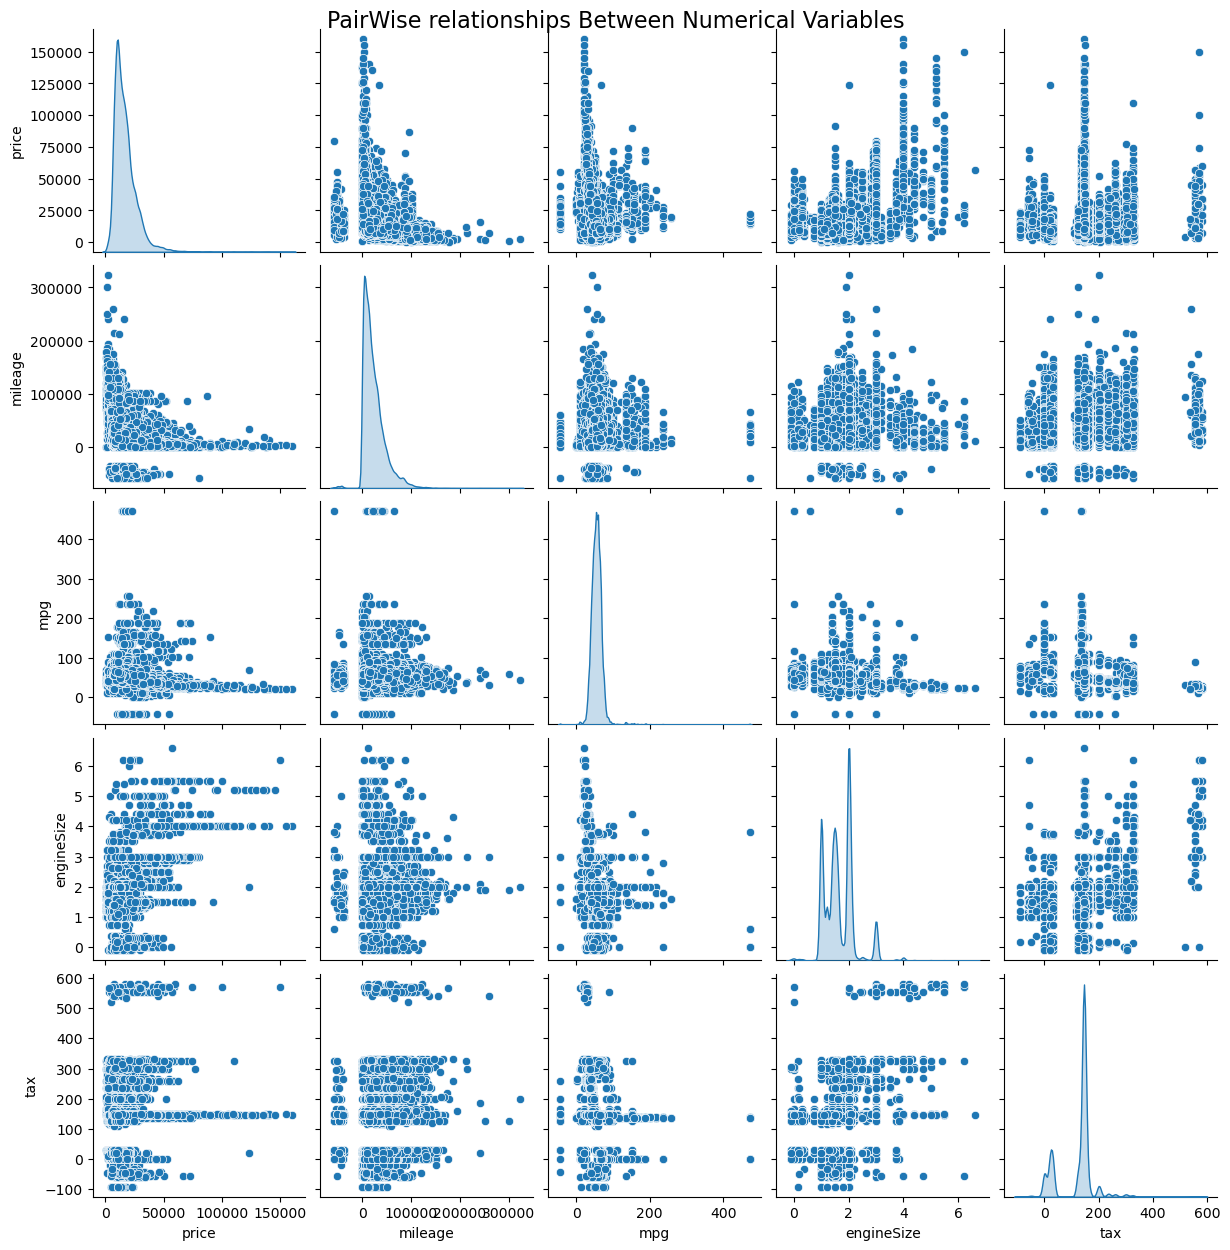

In [34]:
sns.pairplot(df_train[["price","mileage", "mpg", "engineSize", "tax"]], diag_kind="kde")
plt.suptitle("PairWise relationships Between Numerical Variables",
             y=1,
             fontsize=16)
plt.show()

We decided to use a pairplot to identify preliminary relationships between variables, observing a **negative correlation** between `price` and `mileage` and a  **positive correlation** between `price` and `engine size`.Although noise and **missing values** reduce clarity.

<h4 style="color: #00E676;">Multivariate Analysis - FuelType, Mileage, Price</h4> 

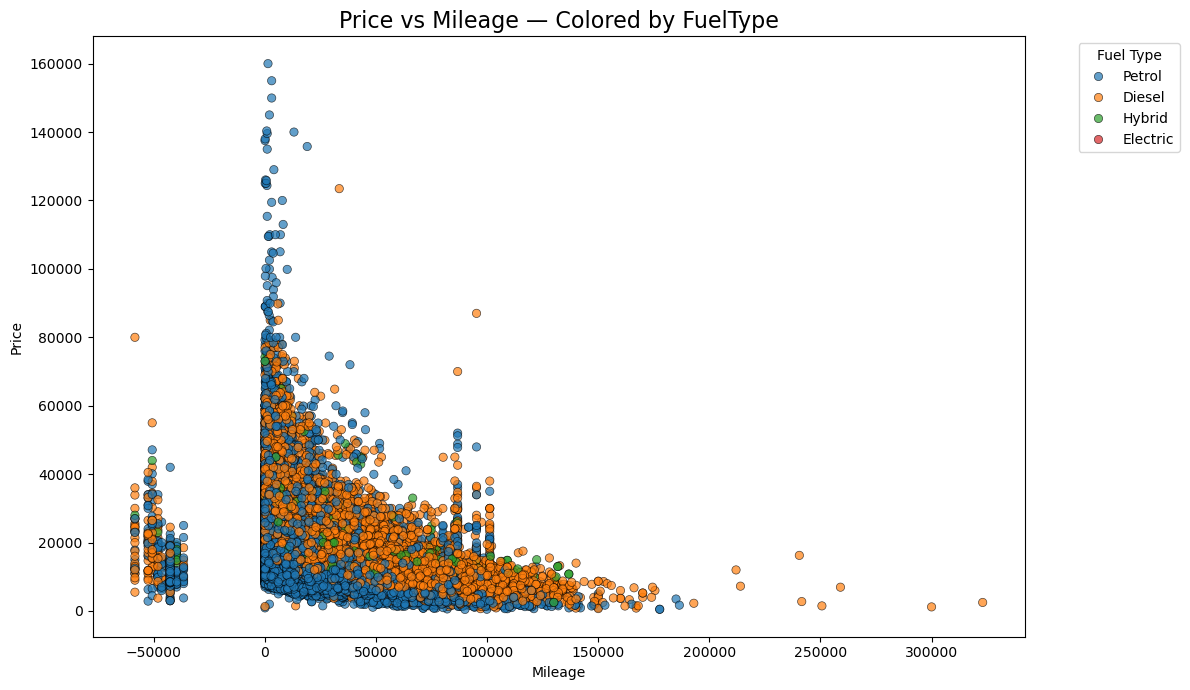

In [35]:
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="fuelType",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by FuelType", fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The analysis **confirms that depreciation** (the negative relationship between `Price` and `Mileage`) holds universally for the most common fuel types (Diesel and Petrol). However, `FuelType` acts as a shifting factor: Hybrid and (to a lesser extent) Electric cars are concentrated in the low `Mileage` and high Price area, indicating they are **newer** and **more expensive models** in the dataset. This pattern justifies the **importance** of including both `Mileage` (continuous) and `Fuel Type` (categorical) in the predictive model.

<h4 style="color: #00E676;">Multivariate Analysis - Brand, Mileage, Price</h4> 

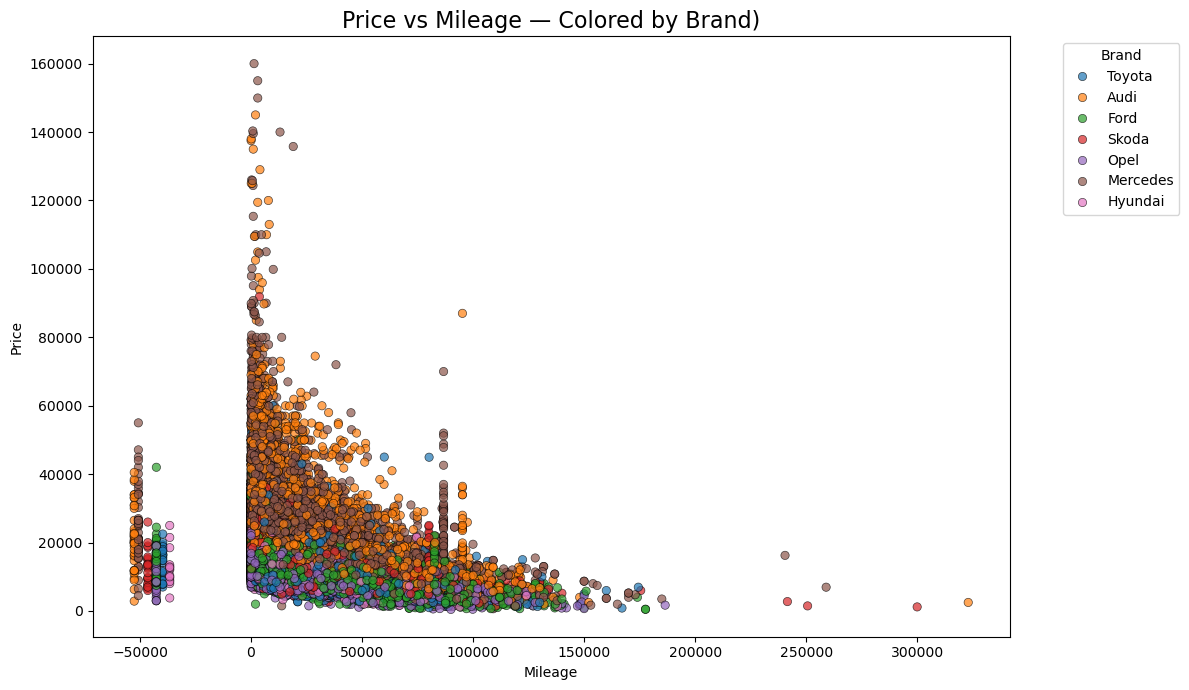

In [36]:
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="Brand",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by Brand)",
          fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The analysis reveals **significant segmentation** and **vertical stratification** by **brand**. While all `brands` adhere to the general principle of depreciation (`Price` decreases with `Mileage`), **premium brands** such as `Audi`, `BMW`, and `Mercedes` form **distinct**, **higher clusters**, showing consistently **higher prices** than mass-market brands like `Ford`, `Toyota`, and `Vw` at any given mileage point. This confirms that `Brand` is a **powerful categorical feature** whose market segment is **highly correlated** with the initial price and the retained value throughout the vehicle's lifespan, necessitating its inclusion via one-hot encoding in the model.

<h4 style="color: #00E676;">Multivariate Analysis - Price vs Year - Color=fuelType</h4> 

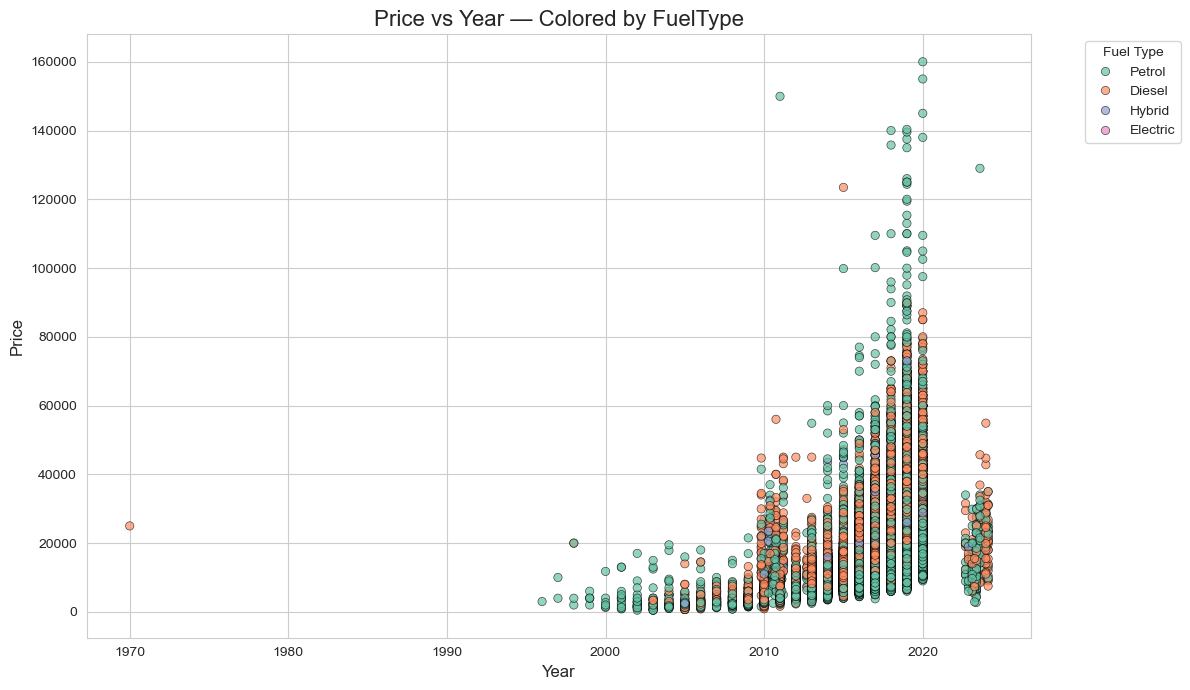

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",              
    y="price",                
    hue="fuelType",           
    palette="Set2",             
    alpha=0.7,                 
    edgecolor="k"            
)

# Titles and labels
plt.title("Price vs Year — Colored by FuelType",
          fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The analysis confirms the **strong positive relationship** between `Year` and `Price` (newer cars are more expensive) across all fuel types. `FuelType` causes a **horizontal** and **vertical segmentation**: `Petrol` and `Diesel` cars span the entire time range, representing the **full depreciation curve**. In contrast, `Hybrid` and `Electric` vehicles clustes heavily towards the most recent years (high Year values), commanding **higher baseline prices** than their conventional counterparts at the same age. This confirms that both the continuous variable `Year` and the categorical variable `FuelType` are **essential predictors** of the vehicle's value.

<h4 style="color: #00E676;">Multivariate Analysis - Price vs Year - Color= Brand</h4> 

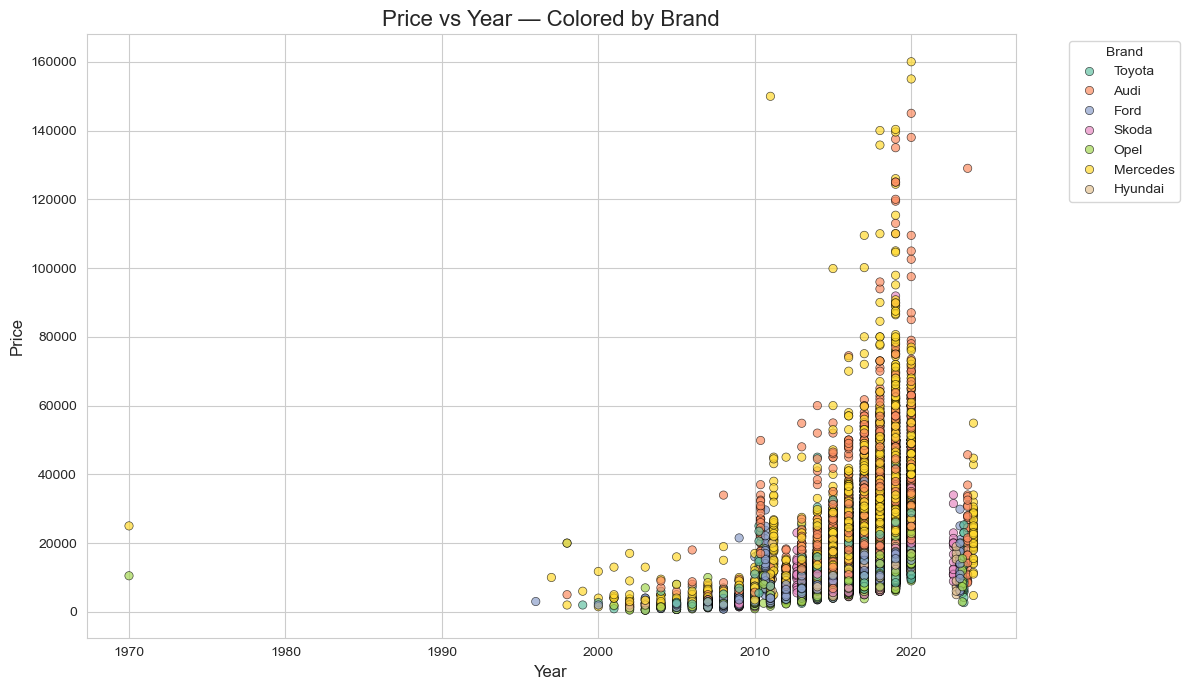

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",                
    y="price",                 
    hue="Brand",             
    palette="Set2",           
    alpha=0.7,                 
    edgecolor="k"               
)


plt.title("Price vs Year — Colored by Brand", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The analysis shows a clear **stratification** of **prices** by `brand`, confirming the **premium status** of certain manufacturers. All brands adhere to the fundamental rule that `Price` increases with `Year` (newer cars are more expensive). However, **Premium Brands** (`Audi`, `BMW`, `Mercedes`) form distinct, higher price clusters at any given year compared to **Mass-Market Brands** (`Ford`, `Toyota`, `VW`, `Opel`, `Hyundai`). This strong vertical separation confirms that `Brand` is a **critical predictor** of value, determining the `price` segment and baseline value of the vehicle regardless of its age. The **difference** in price retention and the ceiling price for the newer models are **visibly highest**for the premium group.

<h4 style="color: #00E676;">Pairplot to Brand</h4> 

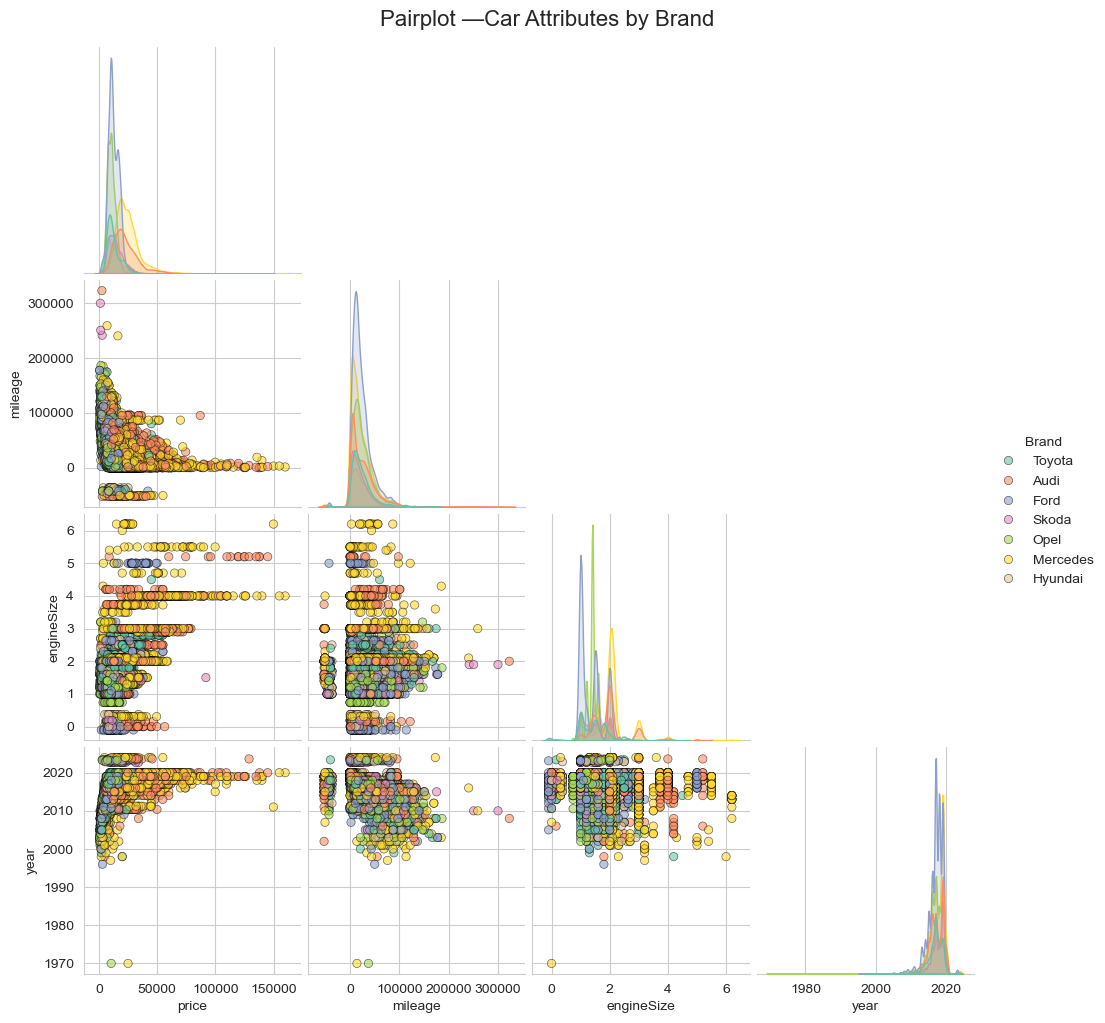

In [39]:
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="Brand",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)
plt.suptitle("Pairplot —Car Attributes by Brand",
             y=1.02,
             fontsize=16)
plt.show()

The pairplot **validates all previous multivariate** findings simultaneously. It confirms the **strong positive correlations** for Price vs. Year and `Price` vs. `Engine Size` and the **negative correlation** for `Price` vs. `Mileage`. Critically **Premium Brands** `Audi` `BMW` `Mercedes` consistently occupy the **highest** price and engine size clusters while Mass-Market Brands concentrate in the **lower ranges**. The plot confirms `Brand` is the **most significant categorical differentiator** dictating the expected distribution and maximum values for all other key numerical attributes.

<h4 style="color: #00E676;">Price distribution by Brand</h4> 

C:\Users\danie\AppData\Local\Temp\ipykernel_13704\381057388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


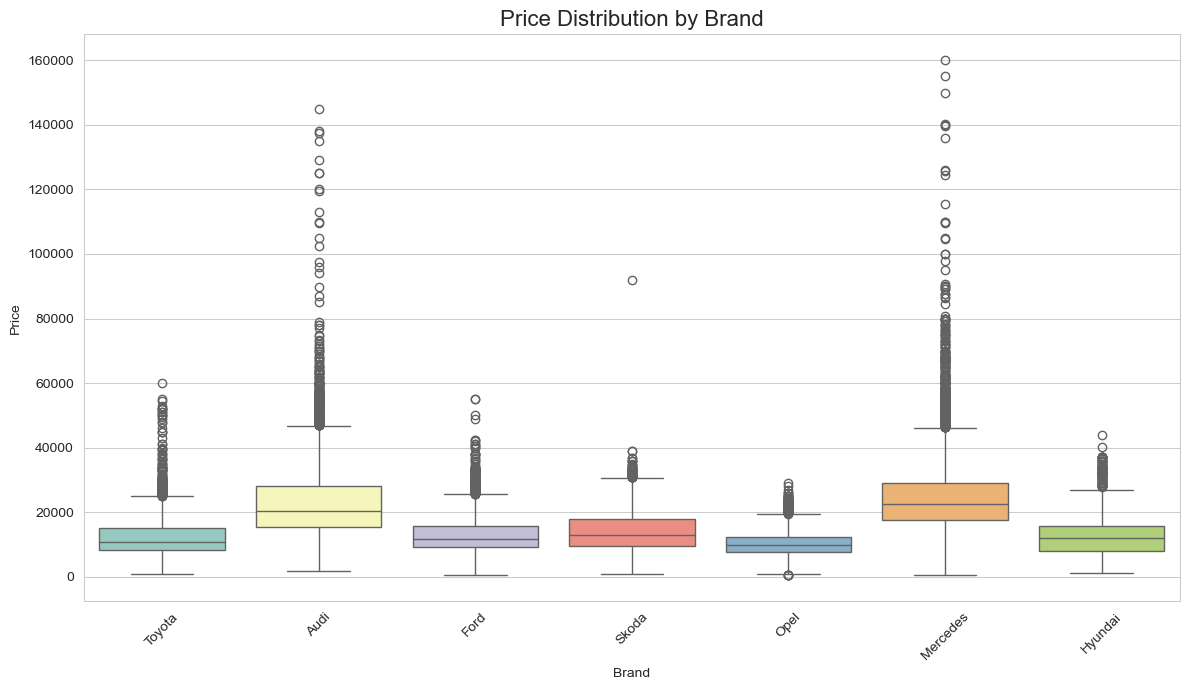

In [40]:
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.boxplot(
    data=df_filtered,
    x="Brand",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Brand", fontsize=16)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis shows **strong vertical stratification** of **median prices**: Premium Brands (`Mercedes`, `Audi`, `BMW`) exhibit the **highest median prices** and generally **have larger Interquartile Ranges** (IQR), indicating **higher price variability** and **value retention**. Mass-Market Brands (`Ford`, `VW`, `Toyota`, `Skoda`, `Opel`, `Hyundai`) form the **lower price** tier, with significantly **lower median prices** and generally smaller IQRs. All `brands` display a possible large number of **outliers** (individual points above the upper whisker), confirming the presence of **high-value**, **high-price vehicles** (e.g., performance or rare models) even within the standard brands. This strong **segmentation validates** the decision to use one-hot encoding on the `Brand` feature in the predictive model.

<h4 style="color: #00E676;">Price Distribution by Transmission</h4> 

C:\Users\danie\AppData\Local\Temp\ipykernel_13704\4222811036.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


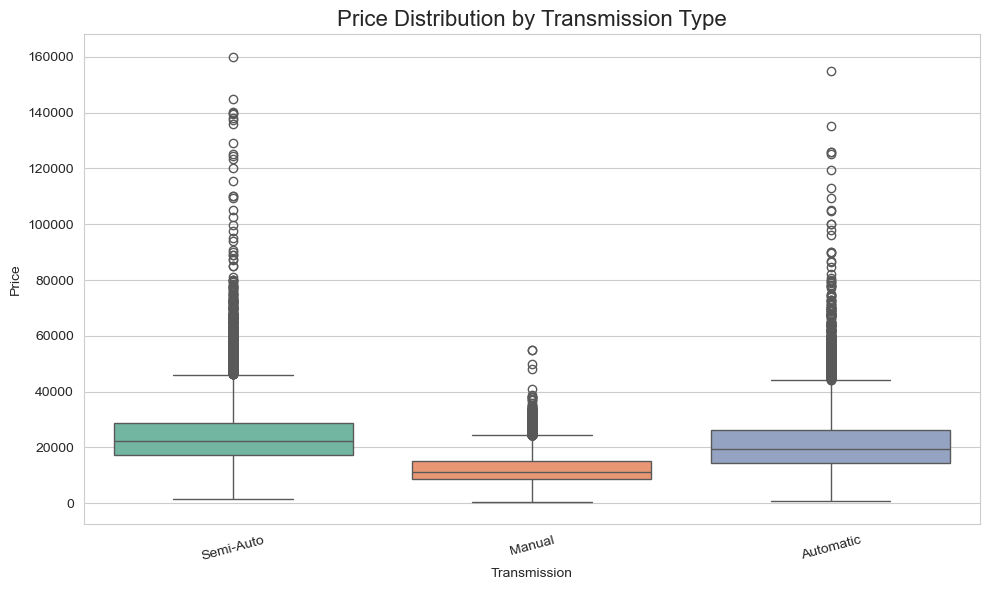

In [41]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.boxplot(
    data=df_filtered,
    x="transmission",
    y="price",
    palette="Set2"
)

plt.title("Price Distribution by Transmission Type", fontsize=16)
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The analysis confirms a **strong vertical stratification** in median prices: `Automatic` cars exhibit the **highest median price**, followed closely by `Semi-Auto`, while `Manual` cars have the **lowest median price**. Both automatic and `semi-automatic` `transmissions` display a greater `price` variability (larger interquartile range and longer whiskers), indicating they cover a **wider range** of **high-end** and **luxury vehicles** compared to `manual transmissions`. This segmentation is a **fundamental finding of the EDA**, underscoring why `transmission` type is a **critical categorical feature** for the predictive model.

<h4 style="color: #00E676;">Price Distribution by FuelType</h4> 

C:\Users\danie\AppData\Local\Temp\ipykernel_13704\4062865563.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


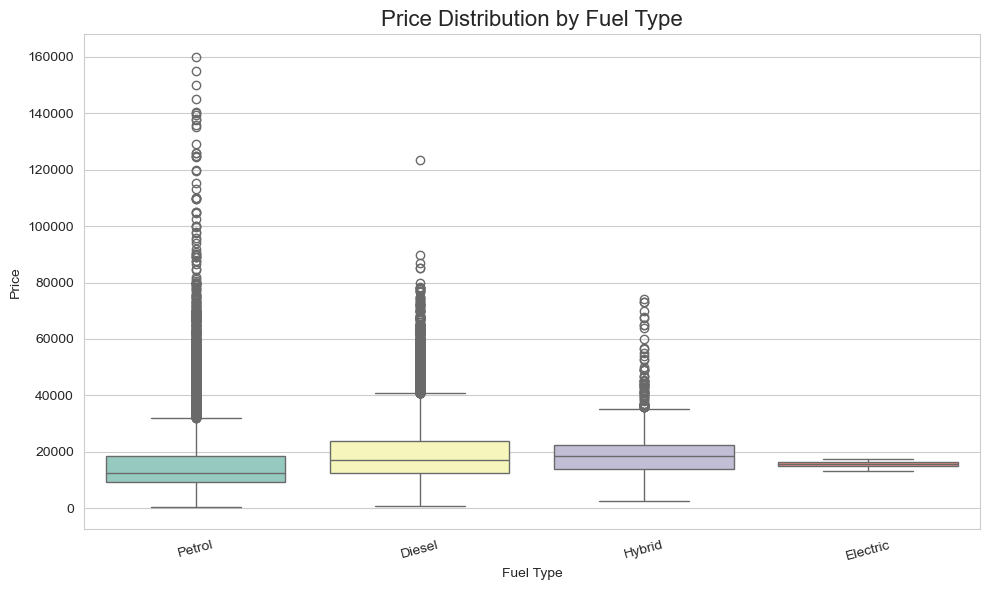

In [42]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_filtered,
    x="fuelType",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Fuel Type", fontsize=16)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The box plot of `Price` segmented by `Fuel Type` confirms **significant differences** in market value driven by **technology**. The analysis shows that `Hybrid` and `Electric` vehicles exhibit the **highest median prices** compared to the conventional `Diesel` and `Petrol` groups. `Diesel` cars occupy a mid-to-high price range, suggesting they retain **higher value** than petrol cars on average, which typically have the **lowest median price**. All segments display a similar spread of possible **outliers**, confirming the presence of high-value specialty vehicles across all `fuel types`. This segmentation validates `Fuel Type` as a critical categorical feature for predicting vehicle price.

<h4 style="color: #00E676;">Key Car Attributes by Transmission</h4> 

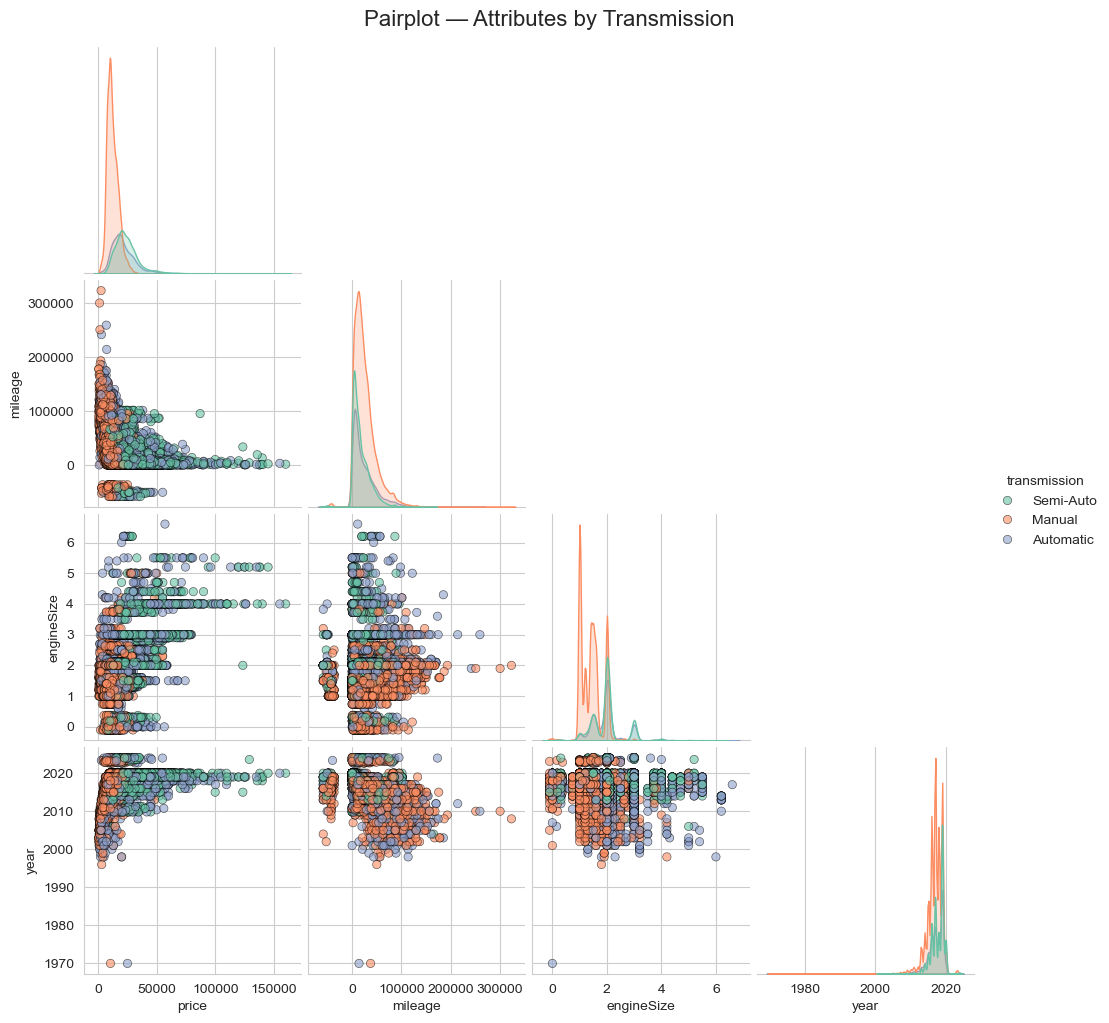

In [43]:
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="transmission",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Transmission", y=1.02, fontsize=16)
plt.show()

The pairplot provides comprehensive confirmation that `Transmission` is a **major segmenting factor** in the used car market, influencing the **distribution and relationships** of all other key attributes. `Automatic` and `Semi-Auto` vehicles consistently form higher value clusters across the plots: they dominate the highest price ranges (`Price` vs. `Year/EngineSize`) and are strongly associated with larger `Engine Sizes` (`EngineSize` vs. `Mileage/Price`). In contrast, **Manual** vehicles typically occupy the **lower to mid-range values** in `Price` and `Engine Size`, while their mileage is spread more widely across all years. This **stratification** confirms that the **complexity** and market preference for **automatic transmissions** set a fundamentally higher baseline value and are linked to more expensive, powerful vehicles.

<h4 style="color: #00E676;">Key Car Attributes by Fuel Type</h4> 

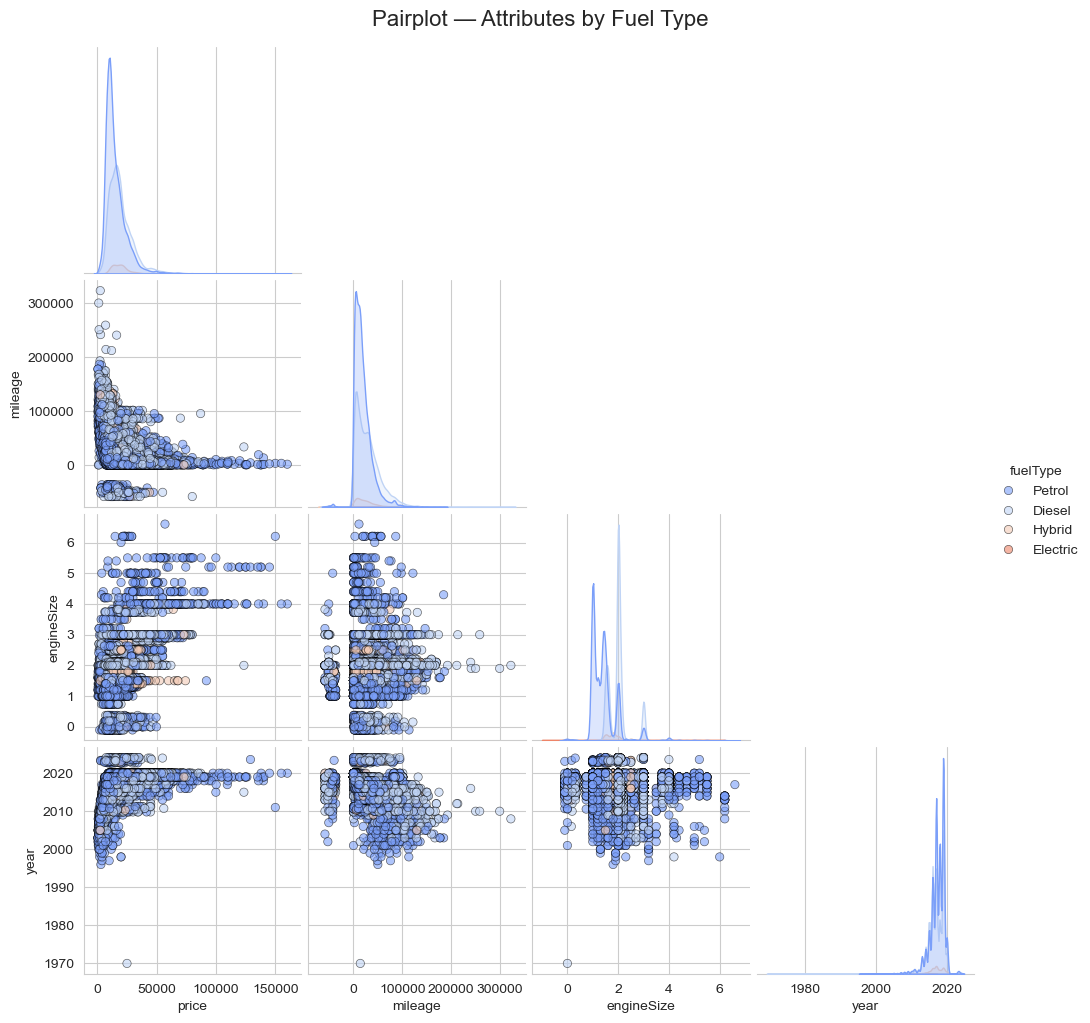

In [44]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="fuelType",
    palette="coolwarm",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Fuel Type", y=1.02, fontsize=16)
plt.show()

The pairplot provides a comprehensive view of how` Fuel Type` **segments** the vehicle market based on **value**, **age**, and **engine characteristics**. `Hybrid` and `Electric` vehicles consistently form distinct clusters at the **highest prices** (`Price` vs. `Year/Mileage`) and are heavily concentrated in the newest years (high Year values). Critically, they also cluster around the **smallest engine sizes** (`Engine Size` plots). `Petrol` and `Diesel` vehicles, representing the **conventional market**, span the entire range of values and are associated with a broader spectrum of `engine sizes` and `prices`. This segmentation **confirms** that `Fuel Type` is a **primary categorical differentiator**, separating the established depreciation curve of conventional cars from the **high-value**, **low-mileage** profile of newer, alternative-fuel technologies.

<h4 style="color: #00E676;">Correlation Matrix before cleaning the data</h4> 

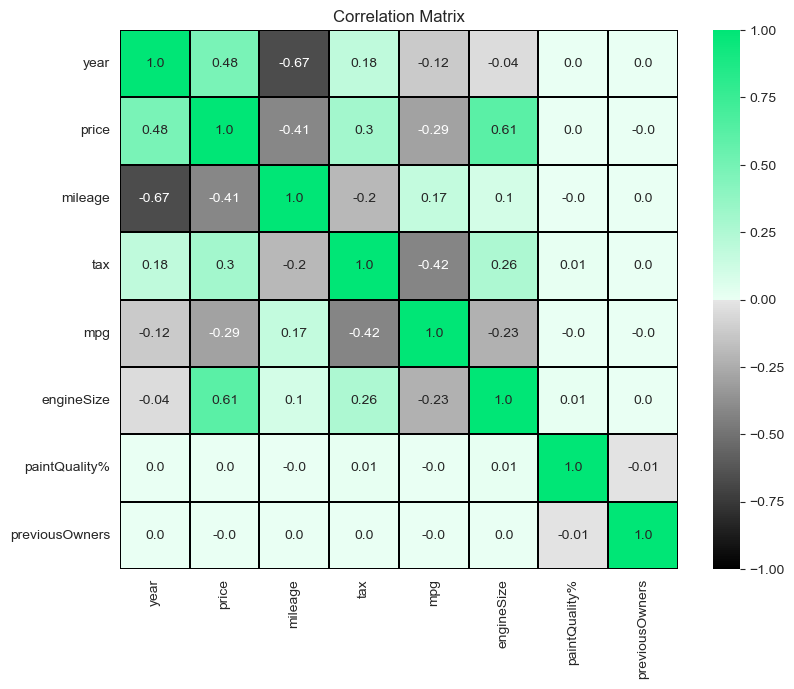

In [45]:
num = df_train.select_dtypes(include="number").drop(columns=["carID", "hasDamage"], errors="ignore")
corr = num.corr(numeric_only=True).round(2)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

The matrix immediately confirms the **strongest linear relationships** with the **target variable**, `price`. `engineSize` exhibits the **strongest positive correlation** ($\approx$ 0.61). `Year` follows closely with a **strong** ($\approx$ 0.48), indicating that newer cars are **significantly more expensive**. The only notable **negative relationship** is with `mileage` ($\approx$ -0.41), confirming that higher mileage leads to a **lower price** (depreciation). **High** inter-feature **correlations**, such as between `engineSize` and `tax` ($\approx$ 0.26), also highlight potential **multicollinearity issues** that might require attention during model selection (e.g., using regularization techniques). Overall, the **heatmap validates** `Year` and `engineSize` as the **most influential numerical predictors** of price.

<h2 style="color: #00E676;">2. Data Preprocessing</h2>

In [46]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,Vw,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,Fiesta,2018.0,12500,Anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,Bmw,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [47]:
df_train.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.00,74482.00,75973.00,74510.00,68069.00,68047.00,74457.00,74449.00,74423.00,74425.0
mean,37986.00,2017.10,16881.89,23004.18,120.33,55.15,1.66,64.59,1.99,0.0
std,21931.66,2.21,9736.93,22129.79,65.52,16.50,0.57,21.02,1.47,0.0
min,0.00,1970.00,450.00,-58540.57,-91.12,-43.42,-0.10,1.64,-2.35,0.0
25%,18993.00,2016.00,10200.00,7423.25,125.00,46.30,1.20,47.00,1.00,0.0
50%,37986.00,2017.00,14699.00,17300.00,145.00,54.30,1.60,65.00,2.00,0.0
75%,56979.00,2019.00,20950.00,32427.50,145.00,62.80,2.00,82.00,3.00,0.0
max,75972.00,2024.12,159999.00,323000.00,580.00,470.80,6.60,125.59,6.26,0.0


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           75973 non-null  object 
 2   model           75973 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    75973 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        75973 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [198]:
df_train_new = df_train.copy()
df_test_new  = df_test.copy()


<h4 style="color: #00E676;">Remove column "HasDamage"</h4> 

In [199]:
#Function to remove "hasDamage and paintQuality%"
def initial_cleaning(df):
    if "hasDamage" in df.columns:
        df = df.drop(columns=["hasDamage", "paintQuality%"])
    
    return df

In [200]:
#Aplly the function for the train and the test datasets
df_train_new = initial_cleaning(df_train_new)
df_test_new = initial_cleaning(df_test_new)
df_train_new.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners
0,69512,Vw,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,4.000000
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,1.000000
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,4.000000
3,29021,Ford,Fiesta,2018.0,12500,Anual,9102.0,Petrol,145.0,65.700000,1.0,-2.340306
4,10062,Bmw,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,3.000000


**Dropping** the `HasDamage` column, since all known values are `0` and the variable has **no relevance** for the model. **Dropping** the paintQuality column because it is the mechanic’s assessment of the cars’ overall paint quality and hull integrity not relevant for the model.

<h3 style="color: #00E676;">2.1. Digitalization Problems Solve</h3>

<h4 style="color: #00E676;">2.1.1. Brand </h4>

**Correction** of the **brand names** in the `Brand` column, with only the `N/A` **values remaining** using the function dig_solve_brand.

In [201]:
def dig_solve_brand(df):
    brand_clean = df["Brand"].astype(str).str.strip().str.lower()

    # 2 — Corrections dictionary
    corrections = {
        "ercece": "mercedes", "mercede": "mercedes", "ercedes": "mercedes", "ercede": "mercedes",
        "for": "ford", "ord": "ford", "or": "ford",
        "bmw": "bmw", "mw": "bmw", "bm": "bmw", "m": "bmw",
        "ope": "opel", "pel": "opel", "pe": "opel",
        "vw": "vw", "w": "vw", "v": "vw",
        "aud": "audi", "udi": "audi", "ud": "audi",
        "oyota": "toyota", "toyot": "toyota", "oyot": "toyota",
        "koda": "skoda", "skod": "skoda", "kod": "skoda",
        "hyunda": "hyundai", "yundai": "hyundai", "yunda": "hyundai",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": np.nan
    }

    # 3 — Apply corrections
    brand_clean = brand_clean.replace(corrections)

    # 4 — Conversion (BMW → Bmw)
    df["Brand_clean"] = brand_clean.str.title()

    return df

In [202]:
#Aplly function to the train and test datasets
df_train_new = dig_solve_brand(df_train_new)
df_test_new = dig_solve_brand(df_test_new)
df_train_new["Brand_clean"].value_counts(dropna=False)


Brand_clean
Ford        16063
Mercedes    11674
Vw          10385
Opel         9352
Bmw          7392
Audi         7325
Toyota       4622
Skoda        4303
Hyundai      3336
NaN          1521
Name: count, dtype: int64

<h4 style="color: #00E676;">2.1.2. Fuel Type </h4>

**Correct** the **names** of the **different fuel types** in the `Fueltype` column, leaving only the `N/A` **values remaining** using the function dig_solve_type.

In [203]:
def dig_solve_type(df):
    fuel = df["fuelType"].astype(str).str.strip().str.lower()

    # Corrections dictionary
    corrections = {
        "petro": "petrol", "etrol": "petrol", "etro": "petrol",
        "iesel": "diesel", "diese": "diesel", "iese": "diesel",
        "hybri": "hybrid", "ybrid": "hybrid", "ybri": "hybrid",
        "othe": "other", "ther": "other",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": np.nan
    }

    # Apply corrections
    fuel = fuel.replace(corrections)

    df["fuelType_clean"] = fuel

    return df

In [204]:
#Aplly function to the train and test datasets
df_train_new = dig_solve_type(df_train_new)
df_test_new = dig_solve_type(df_test_new)
df_train_new["fuelType_clean"].value_counts(dropna=False)


fuelType_clean
petrol      41181
diesel      30885
hybrid       2225
NaN          1511
other         167
electric        4
Name: count, dtype: int64

<h4 style="color: #00E676;">2.1.3. Transmission </h4>


**Correct** the **names** of the **different transmission types** in the `transmission` column, leaving only the `N/A` **values remaining** using the function dig_solve_transmission.

In [205]:
def dig_solve_transmission(df):
    tr = df["transmission"].astype(str).str.strip().str.lower()

    # Corrections dictionary
    corrections = {
        "anual": "manual", "manua": "manual", "anua": "manual",
        "semi-aut": "semi-auto", "emi-auto": "semi-auto", "emi-aut": "semi-auto",
        "automati": "automatic", "utomatic": "automatic", "utomati": "automatic",
        "unknow": "unknown", "nknown": "unknown", "nknow": "unknown",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": "unknown"
    }

    # Apply corrections
    tr = tr.replace(corrections)

    # New column
    df["transmission_clean"] = tr

    return df

In [206]:
#Aplly function to the train and test datasets
df_train_new = dig_solve_transmission(df_train_new)
df_test_new = dig_solve_transmission(df_test_new)
df_test_new["transmission_clean"].value_counts(dropna=False)


transmission_clean
manual       17889
semi-auto     7267
automatic     6440
NaN            623
unknown        345
other            3
Name: count, dtype: int64

In [207]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 15)
(32567, 14)


<h4 style="color: #00E676;">2.1.4. Model - Correction model names with RapidFuzz </h4>

A normalization function `(_norm)` was developed to **standardize strings** before correction, converting them to **lowercase**, **special characters**, and **extra spaces** to ensure **consistent comparisons**.

Then, the `find_best_in_catalog` function was created to check whether a **value exists** in the **canonical catalog** and, if not, apply approximate **matching** (fuzzy matching) using the `RapidFuzz` library. The algorithms `token_set_ratio` and `token_sort_ratio` were used, returning the most **similar value**, its similarity score, and the method applied. Two `thresholds` (threshold_high and threshold_low) were also defined to **control** the **confidence level** of accepted matches.

Based on this function, a **canonical catalog** of models was built for **each brand**, considering only models with a frequency above a brand-specific limit defined in `threshold_dict`. For each brand, the function was applied within its ***respective catalog**, and valid matches (`token_set` or `token_sort`) were stored in a **mapping** dictionary (`model_cleaning_dict`).

Finally, the `model_clean_fuzzy` column was created to apply the **automatic corrections** stored in the **dictionary**, **keeping** the **original value** when **no match** was found. This process ensured the standardization of model names within each brand,** reducing spelling errors** and **inconsistencies**.

In [208]:
from rapidfuzz import process, fuzz
import numpy as np
import pandas as pd
import re, unicodedata

def _norm(s):
    if s is None or (isinstance(s, float) and pd.isna(s)):
        return ""
    s = str(s).casefold().strip()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"[/_.\-]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def find_best_in_catalog(word, catalog_list, threshold_high=92, threshold_low=85):
    if word is None or (isinstance(word, float) and pd.isna(word)):
        return (word, 0.0, "null")
    if not catalog_list:
        return (word, 0.0, "no_catalog")

    word_norm = _norm(word)

    # normaliza o catálogo mas guarda canonical
    # (se houver colisões, fica a última — idealmente o catálogo já é canonical)
    norm_to_canon = {_norm(c): c for c in catalog_list}
    catalog_norm = list(norm_to_canon.keys())

    # match exato após normalização
    if word_norm in norm_to_canon:
        return (norm_to_canon[word_norm], 100.0, "exact_in_catalog")

    best_norm, score, _ = process.extractOne(word_norm, catalog_norm, scorer=fuzz.token_set_ratio)
    method = "token_set"

    best_norm2, score2, _ = process.extractOne(word_norm, catalog_norm, scorer=fuzz.token_sort_ratio)
    if score2 > score:
        best_norm, score, method = best_norm2, score2, "token_sort"

    best_canon = norm_to_canon.get(best_norm, word)

    if score >= threshold_high:
        return (best_canon, float(score), method)
    elif score >= threshold_low:
        return (best_canon, float(score), method)
    else:
        return (best_canon, float(score), "review")

def build_model_catalog(df_train, threshold_dict):
    catalog_dict = {}

    # garante que Brand_clean está normalizado como no threshold_dict (ex: "ford")
    brands = df_train["Brand_clean"].dropna().unique()

    for brand in brands:
        brand_norm = _norm(brand)
        df_brand = df_train[df_train["Brand_clean"] == brand].copy()

        # conta por "model" ORIGINAL, mas podes querer contar por _norm(model) se houver muita variação
        freq = (
            df_brand.dropna(subset=["model"])
            .groupby("model")
            .size()
            .reset_index(name="count")
            .sort_values(by="count", ascending=False)
        )

        threshold = threshold_dict.get(brand_norm, 0)
        catalog_dict[brand_norm] = list(freq.loc[freq["count"] >= threshold, "model"])

    return catalog_dict

def build_model_cleaning_dict(df_train, catalog_dict):
    cleaning_dict = {}

    for brand in df_train["Brand_clean"].dropna().unique():
        brand_norm = _norm(brand)
        df_brand = df_train[df_train["Brand_clean"] == brand].copy()
        catalog_list = catalog_dict.get(brand_norm, [])

        for model in df_brand["model"].dropna().unique():
            match, score, status = find_best_in_catalog(model, catalog_list)

            # chave normalizada (robusta)
            key = f"{brand_norm}-{_norm(model)}"

            # só “auto-corrige” quando tens confiança
            if status in ("token_set", "token_sort", "exact_in_catalog"):
                cleaning_dict[key] = match

    return cleaning_dict

def apply_model_cleaning(df, cleaning_dict, out_col="model_clean_fuzzy"):
    df = df.copy()

    brand_norm = df["Brand_clean"].map(_norm)
    model_norm = df["model"].map(_norm)

    key = brand_norm + "-" + model_norm

    # só tenta map quando há brand e model
    mask = df["Brand_clean"].notna() & df["model"].notna()
    df[out_col] = df["model"]

    df.loc[mask, out_col] = key[mask].map(cleaning_dict).fillna(df.loc[mask, "model"])

    # opcional: padronizar só a “apresentação”, sem destruir canonical
    df[out_col] = df[out_col].astype(str).str.strip()

    return df


In [209]:
threshold_dict = {
    "ford": 139,
    "vw": 40,
    "opel": 66,
    "mercedes": 128,
    "bmw": 66,
    "audi": 219,
    "toyota": 34,
    "skoda": 86,
    "hyundai": 70,
}

In [211]:
catalog_dict = build_model_catalog(df_train_new, threshold_dict)
model_cleaning_dict = build_model_cleaning_dict(df_train_new, catalog_dict)
df_train_new = apply_model_cleaning(df_train_new, model_cleaning_dict)
df_test_new  = apply_model_cleaning(df_test_new,  model_cleaning_dict)


In [212]:
df_train["model"].apply(type).value_counts()

model
<class 'str'>    75973
Name: count, dtype: int64

In [213]:
df_train_new["model_clean_fuzzy"].apply(type).value_counts()

model_clean_fuzzy
<class 'str'>    75973
Name: count, dtype: int64

In [214]:
df_train["model"] = df_train["model"].astype(str).str.strip().str.title()
model_counts = df_train["model"].value_counts(dropna=False)
model_counts

model
Focus           6775
C Class         5194
Fiesta          4384
Golf            3261
Corsa           2319
                ... 
Urban Cruise       1
6 Serie            1
Land Cruise        1
Vers               1
Terracan           1
Name: count, Length: 297, dtype: int64

In [215]:
df_train_new["model_clean_fuzzy"] = df_train_new["model_clean_fuzzy"].astype(str).str.strip().str.title()
model_counts = df_train_new["model_clean_fuzzy"].value_counts(dropna=False)
model_counts

model_clean_fuzzy
Focus            6911
C Class          5286
Fiesta           4469
Golf             3266
Corsa            2359
                 ... 
Urban Cruise        1
Fiest               1
Terracan            1
Zafira Tourer       1
Grand C-Ma          1
Name: count, Length: 218, dtype: int64

In [216]:
print(df_train_new.columns)
print(df_test_new.columns)

Index(['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_clean',
       'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy'],
      dtype='object')
Index(['carID', 'Brand', 'model', 'year', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_clean',
       'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy'],
      dtype='object')


In [217]:
df_train_new.drop(columns=["Brand", "model", "fuelType", "transmission"], inplace=True)
df_test_new.drop(columns=["Brand", "model", "fuelType", "transmission"], inplace=True)

In [218]:
print(df_train_new.columns)
print(df_test_new.columns)

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')
Index(['carID', 'year', 'mileage', 'tax', 'mpg', 'engineSize',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')


In [219]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 12)
(32567, 11)


The normalization of model names was performed using deterministic methods and fuzzy matching based exclusively on the training set, without using any information from the target. The corrected model catalog was then applied to the test set. Since this transformation depends only on the observed categories and not on any statistical metric, it does not introduce data leakage and can be performed prior to cross-validation.

<h3 style="color: #00E676;">2.2. Solve inconsistencies</h3>

<h4 style="color: #00E676;">2.2.1. Convert to N/A - Mileage</h4> 

In [220]:
def convert_to_na(df):
    # mileage: converter para numérico + tratar negativos
    df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")
    df["mileage"] = df["mileage"].where(df["mileage"] >= 0, other=np.nan
    )
    

    return df

In [221]:
df_train_new = convert_to_na(df_train_new)
df_test_new = convert_to_na(df_test_new)


In [222]:
print((df_train_new["mileage"] < 0).sum(), (df_test_new["mileage"] < 0).sum())

0 0


In [223]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 12)
(32567, 11)


Converting negative and non-numeric values in the mileage column to NaN, since mileage cannot be negative and these values represent data errors.

<h3 style="color: #00E676;">2.2.2. Solve Mpg</h> 

In [224]:
def fix_mpg(df_to_fix, reference_df):

    # mpg do dataset a corrigir
    mpg_fix = pd.to_numeric(df_to_fix["mpg"], errors="coerce")
    model_fix = df_to_fix["model_clean_fuzzy"].astype(str).str.strip().str.casefold()

    # mpg do dataset de referência (train)
    mpg_ref = pd.to_numeric(reference_df["mpg"], errors="coerce")
    model_ref = reference_df["model_clean_fuzzy"].astype(str).str.strip().str.casefold()

    # mediana por modelo (apenas valores válidos da referência)
    med_por_modelo = mpg_ref[mpg_ref >= 0].groupby(model_ref[mpg_ref >= 0]).median()

    # negativos no dataset a corrigir
    negative = mpg_fix < 0

    # aplicar correção
    df_to_fix.loc[negative, "mpg"] = model_fix.map(med_por_modelo)

    return df_to_fix


In [225]:
df_train_new = fix_mpg(df_train_new, df_train_new)
df_test_new = fix_mpg(df_test_new, df_train_new)

In [226]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 12)
(32567, 11)


Replacing negative mpg values with the median mpg of the corresponding model, as fuel consumption cannot be negative and model-level medians provide realistic estimates.

<h4 style="color: #00E676;">2.2.3. Convert to positive values - Tax and PreviousOwners</h4> 

In [227]:
def fix_tax_previous_owners(df):
    # Converter tax negativo em positivo
    df["tax"] = df["tax"].mask(df["tax"] < 0, -df["tax"])
    
    # Converter previousOwners negativo em positivo
    df["previousOwners"] = df["previousOwners"].mask(df["previousOwners"] < 0, -df["previousOwners"])
    
    # Arredondar previousOwners para inteiro
    df["previousOwners"] = df["previousOwners"].round()
    
    return df

In [228]:
df_train_new = fix_tax_previous_owners(df_train_new)
df_test_new = fix_tax_previous_owners(df_test_new)

In [229]:
print((df_train_new["tax"] < 0).sum(), (df_train_new["previousOwners"] < 0).sum())

0 0


Converting negative values in tax and previousOwners to their absolute values, and rounding previousOwners to integers, since both variables represent non-negative discrete quantities.

<h4 style="color: #00E676;">2.2.4. Fix invalid engineSize values</h4> 

<h5 style="color: #00E676;"> Solve negative values </h5> 

In [230]:
def fix_engineSize_Ford(df, reference_df):
    df = df.copy()
    reference_df = reference_df.copy()
    eng = pd.to_numeric(df["engineSize"], errors="coerce")
    brand = df["Brand_clean"].astype(str).str.casefold()
    model = df["model_clean_fuzzy"].astype(str).str.casefold()

    # apenas Ford tem engineSize negativo
    ford_mask = brand == "ford"
    negative_eng = eng < 0

    # dados do train
    ref_eng = pd.to_numeric(reference_df["engineSize"], errors="coerce")
    ref_brand = reference_df["Brand_clean"].astype(str).str.casefold()
    ref_model = reference_df["model_clean_fuzzy"].astype(str).str.casefold()

    # modelos válidos da Ford no train
    valid = (ref_brand == "ford") & (ref_eng >= 0)

    # mediana por modelo Ford
    med_por_modelo = ref_eng[valid].groupby(ref_model[valid]).median()

    # corrigir engineSize negativo em Ford
    df.loc[ford_mask & negative_eng, "engineSize"] = model.map(med_por_modelo)

    return df

In [231]:
df_train_new.loc[df_train_new["engineSize"] < 0, "model_clean_fuzzy"].unique()


array(['Kuga', 'Focus', 'Fiesta', 'S-Max', 'Mondeo', 'C-Max', 'Ka+',
       'B-Max', 'Nan', 'Ecosport', 'Galaxy', 'Ka'], dtype=object)

In [232]:
df_train_new = fix_engineSize_Ford(df_train_new, df_train_new)
df_test_new = fix_engineSize_Ford(df_test_new, df_train_new)

Replacing negative engineSize values for Ford vehicles with the median engine size of the corresponding Ford model, as engine displacement cannot be negative and the issue was brand-specific.

<h5 style="color: #00E676;"> Solve engsize type of fuel </h5> 

In [233]:
print("Train  | engineSize = 0 & petrol:",
      ((df_train_new["engineSize"] == 0) & (df_train_new["fuelType_clean"] == "petrol")).sum())
print("Test   | engineSize = 0 & petrol:",
      ((df_test_new["engineSize"] == 0) & (df_test_new["fuelType_clean"] == "petrol")).sum())

print("Train  | engineSize = 0 & diesel:",
      ((df_train_new["engineSize"] == 0) & (df_train_new["fuelType_clean"] == "diesel")).sum())
print("Test   | engineSize = 0 & diesel:",
      ((df_test_new["engineSize"] == 0) & (df_test_new["fuelType_clean"] == "diesel")).sum())

Train  | engineSize = 0 & petrol: 106
Test   | engineSize = 0 & petrol: 58
Train  | engineSize = 0 & diesel: 48
Test   | engineSize = 0 & diesel: 21


In [234]:
def fix_engineSize(df):
    df = df.copy()
    df["engineSize"] = pd.to_numeric(df["engineSize"], errors="coerce")
    mask = (df["engineSize"] == 0) & (df["fuelType_clean"].isin(["petrol", "diesel"]))    
    df.loc[mask, "engineSize"] = np.nan
    return df

In [235]:
df_train_new = fix_engineSize(df_train_new)
df_test_new  = fix_engineSize(df_test_new)

In [236]:
print("Train  | engineSize = 0 & petrol:",
      ((df_train_new["engineSize"] == 0) & (df_train_new["fuelType_clean"] == "petrol")).sum())
print("Test   | engineSize = 0 & petrol:",
      ((df_test_new["engineSize"] == 0) & (df_test_new["fuelType_clean"] == "petrol")).sum())

print("Train  | engineSize = 0 & diesel:",
      ((df_train_new["engineSize"] == 0) & (df_train_new["fuelType_clean"] == "diesel")).sum())
print("Test   | engineSize = 0 & diesel:",
      ((df_test_new["engineSize"] == 0) & (df_test_new["fuelType_clean"] == "diesel")).sum())

Train  | engineSize = 0 & petrol: 0
Test   | engineSize = 0 & petrol: 0
Train  | engineSize = 0 & diesel: 0
Test   | engineSize = 0 & diesel: 0


Setting engineSize to NaN for petrol and diesel vehicles with engineSize = 0, since internal combustion engines cannot have zero displacement.

<h4 style="color: #00E676;">2.2.5. Solve year above 2020 </h4> 

In [237]:
def mark_invalid_year(df, year_max=2020):
    y = pd.to_numeric(df["year"], errors="coerce")
    df["year"] = y.where((y <= year_max), other=np.nan)
    return df

In [238]:
df_train_new = mark_invalid_year(df_train_new)
df_test_new  = mark_invalid_year(df_test_new)

In [239]:
print("Treino > 2020:", (df_train_new["year"] > 2020).sum())
print("Teste > 2020:",  (df_test_new["year"] > 2020).sum())

print("Treino NaN year:", df_train_new["year"].isna().sum())
print("Teste NaN year:", df_test_new["year"].isna().sum())

Treino > 2020: 0
Teste > 2020: 0
Treino NaN year: 1849
Teste NaN year: 833


Converting year values greater than 2020 to NaN, as the dataset only contains vehicles observed up to that year.

<h4 style="color: #00E676;">2.2.6. Round Cols</h4> 

In [240]:
def round_columns(df):
    cols = ["mpg", "previousOwners", "mileage"]
    df[cols] = df[cols].round(2)
    return df

In [241]:
df_train_new = round_columns(df_train_new)
df_test_new  = round_columns(df_test_new)
df_train_new.head()

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
0,69512,2016.0,22290,28421.0,NaN,11.42,2.0,4.0,Vw,petrol,semi-auto,Golf
1,53000,2019.0,13790,4589.0,145.0,47.90,1.5,1.0,Toyota,petrol,manual,Yaris
2,6366,2019.0,24990,3624.0,145.0,40.90,1.5,4.0,Audi,petrol,semi-auto,Q2
3,29021,2018.0,12500,9102.0,145.0,65.70,1.0,2.0,Ford,petrol,manual,Fiesta
4,10062,2019.0,22995,1000.0,145.0,42.80,1.5,3.0,Bmw,petrol,manual,2 Series


The **.round(2) function** is applied to the `mpg`, `previousOwners`, and `mileage` columns to **round** their values to **two decimal** places, standardizing the **numerical** precision.

<h3 style="color: #00E676;">2.3. Missing Values</h3>

In [242]:
print(df_train_new.isnull().sum())
print("--------------------------")
print(df_test_new.isnull().sum())

carID                    0
year                  1849
price                    0
mileage               1832
tax                   7904
mpg                   7926
engineSize            1670
previousOwners        1550
Brand_clean           1521
fuelType_clean        1511
transmission_clean    1522
model_clean_fuzzy        0
dtype: int64
--------------------------
carID                    0
year                   833
mileage                859
tax                   3308
mpg                   3288
engineSize             707
previousOwners         597
Brand_clean            649
fuelType_clean         656
transmission_clean     623
model_clean_fuzzy        0
dtype: int64


<h4 style="color: #00E676;"> Year </h4>

In [243]:
def fit_year_imputer(df_train):
    df = df_train.copy()

    # mediana do ano por modelo
    year_model = df.groupby("model_clean_fuzzy")["year"].median()

    # mediana do ano por marca
    year_brand = df.groupby("Brand_clean")["year"].median()

    # mediana global
    year_global = df["year"].median()

    return {
        "year_model": year_model,
        "year_brand": year_brand,
        "year_global": year_global,
    }


In [244]:
def transform_year(df, stats_year):
    df = df.copy()

    missing = df["year"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) por modelo
        est = pd.Series(
            stats_year["year_model"].reindex(df.loc[missing, "model_clean_fuzzy"]).values,
            index=idx
        )

        # 2) fallback: por marca
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_year["year_brand"].reindex(df.loc[missing, "Brand_clean"][missing2]).values,
                index=est.index[missing2]
            )

        # 3) fallback final: global
        est = est.fillna(stats_year["year_global"])

        df.loc[missing, "year"] = est.round().astype("Int64")

    return df


Imputing missing year values using a hierarchical approach (model, brand and global median), since vehicle year is primarily determined by model and brand.

<h4 style="color: #00E676;"> Mileage </h4>

In [245]:
def fit_mileage_imputer(df_train, ref_year=2020):
    df = df_train.copy()

    age_car = (ref_year - df["year"]).clip(lower=0)
    valid_car = df["mileage"].notna() & df["year"].notna() & (age_car > 0)

    rate_per_year = df.loc[valid_car, "mileage"] / age_car.loc[valid_car]

    rate_model  = rate_per_year.groupby(df.loc[valid_car, "model_clean_fuzzy"]).mean()
    rate_brand  = rate_per_year.groupby(df.loc[valid_car, "Brand_clean"]).mean()
    rate_global = rate_per_year.median()

    mask_2020 = (df["year"] == 2020) & df["mileage"].notna()
    r_2020 = df.loc[mask_2020, "mileage"].median()

    return {
        "ref_year": ref_year,
        "rate_model": rate_model,
        "rate_brand": rate_brand,
        "rate_global": rate_global,
        "mileage_2020_median": r_2020,
    }

def transform_mileage(df, stats):
    df = df.copy()

    ref_year = stats["ref_year"]
    age = (ref_year - df["year"]).clip(lower=0)

    # missing mileage que pode ser calculada via desgaste anual
    mileage_missing = df["mileage"].isna() & df["year"].notna() & (age > 0)
    idx_mileage_missing = df.index[mileage_missing]

    if idx_mileage_missing.size > 0:
        # 1) por modelo
        est = pd.Series(stats["rate_model"].reindex(df.loc[mileage_missing, "model_clean_fuzzy"]).values,index=idx_mileage_missing)

        # 2) por marca
        missing = est.isna()
        if missing.any():
            est.loc[missing] = pd.Series(stats["rate_brand"].reindex(df.loc[mileage_missing, "Brand_clean"][missing]).values,index=est.index[missing])

        # 3) global
        est = est.fillna(stats["rate_global"])

        # atualizar mileage estimando mileage = rate * age
        df.loc[mileage_missing, "mileage"] = (est * age.loc[mileage_missing]).round()

    # casos especiais: year == 2020
    mask_2020_nan = (df["year"] == 2020) & df["mileage"].isna()
    if mask_2020_nan.any():
        median_2020 = stats["mileage_2020_median"]
        if pd.isna(median_2020):
            median_2020 = stats["rate_global"]
        df.loc[mask_2020_nan, "mileage"] = round(median_2020)

    return df

Estimating missing mileage values based on vehicle age and average annual usage, as mileage accumulates over time.

<h4 style="color: #00E676;"> Tax </h4>

In [246]:
def fit_tax_imputer(df_train):
    df = df_train.copy()

    # 1) Mediana por Brand + Model + Fuel
    tax_brand_model_fuel = df.groupby(
        ["Brand_clean", "model_clean_fuzzy", "fuelType_clean"]
    )["tax"].median()

    # 2) Mediana por Brand + Model
    tax_brand_model = df.groupby(
        ["Brand_clean", "model_clean_fuzzy"]
    )["tax"].median()

    # 3) Mediana por Brand
    tax_brand = df.groupby(
        ["Brand_clean"]
    )["tax"].median()

    # 4) Mediana global
    tax_global = df["tax"].median()

    return {
        "brand_model_fuel": tax_brand_model_fuel,
        "brand_model": tax_brand_model,
        "brand": tax_brand,
        "global": tax_global
    }

In [247]:
def transform_tax(df, stats_tax):
    df = df.copy()

    # linhas com tax em falta
    missing = df["tax"].isna()
    idx = df.index[missing]

    if idx.size > 0:

        # 1) Brand + Model + Fuel
        keys1 = list(zip(
            df.loc[missing, "Brand_clean"],
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "fuelType_clean"]
        ))
        est = pd.Series(
            stats_tax["brand_model_fuel"].reindex(keys1).values,
            index=idx
        )

        # 2) fallback: Brand + Model
        missing2 = est.isna()
        if missing2.any():
            keys2 = list(zip(
                df.loc[missing, "Brand_clean"][missing2],
                df.loc[missing, "model_clean_fuzzy"][missing2]
            ))
            est.loc[missing2] = pd.Series(
                stats_tax["brand_model"].reindex(keys2).values,
                index=est.index[missing2]
            )

        # 3) fallback: Brand
        missing3 = est.isna()
        if missing3.any():
            est.loc[missing3] = pd.Series(
                stats_tax["brand"].reindex(df.loc[missing, "Brand_clean"][missing3]).values,
                index=est.index[missing3]
            )

        # 4) fallback final: global
        est = est.fillna(stats_tax["global"])

        # imputar
        df.loc[missing, "tax"] = est

    return df

Imputing missing tax values using hierarchical medians (Brand + Model + Fuel, Brand + Model, Brand and Global), since vehicle tax depends on engine configuration and emissions.

<h4 style="color: #00E676;"> Mpg </h4>

In [248]:
def fit_mpg_imputer(df_train):
    df = df_train.copy()

    mpg_brand_model_engine = df.groupby(
        ["Brand_clean", "model_clean_fuzzy", "engineSize"]
    )["mpg"].median()

    mpg_brand_model = df.groupby(
        ["Brand_clean", "model_clean_fuzzy"]
    )["mpg"].median()

    mpg_brand = df.groupby(
        ["Brand_clean"]
    )["mpg"].median()

    mpg_model = df.groupby(
        ["model_clean_fuzzy"]
    )["mpg"].median()

    mpg_global = df["mpg"].median()

    return {
        "brand_model_engine": mpg_brand_model_engine,
        "brand_model": mpg_brand_model,
        "brand": mpg_brand,
        "model": mpg_model,
        "global": mpg_global
    }


In [249]:
def transform_mpg(df, stats_mpg):
    df = df.copy()
    
    missing = df["mpg"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) Brand + Model + EngineSize
        keys1 = list(zip(
            df.loc[missing, "Brand_clean"],
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "engineSize"]
        ))
        est = pd.Series(
            stats_mpg["brand_model_engine"].reindex(keys1).values,
            index=idx
        )

        # 2) fallback: Brand + Model
        missing2 = est.isna()
        if missing2.any():
            keys2 = list(zip(
                df.loc[missing, "Brand_clean"][missing2],
                df.loc[missing, "model_clean_fuzzy"][missing2]
            ))
            est.loc[missing2] = pd.Series(
                stats_mpg["brand_model"].reindex(keys2).values,
                index=est.index[missing2]
            )

        # 3) fallback: Brand
        missing3 = est.isna()
        if missing3.any():
            est.loc[missing3] = pd.Series(
                stats_mpg["brand"].reindex(df.loc[missing, "Brand_clean"][missing3]).values,
                index=est.index[missing3]
            )

        # 4) fallback: Model
        missing4 = est.isna()
        if missing4.any():
            est.loc[missing4] = pd.Series(
                stats_mpg["model"].reindex(df.loc[missing, "model_clean_fuzzy"][missing4]).values,
                index=est.index[missing4]
            )

        # 5) fallback final: Global
        est = est.fillna(stats_mpg["global"])

        df.loc[missing, "mpg"] = est

    return df

Imputing missing mpg values using hierarchical medians (Brand + Model + EngineSize, Brand + Model, Brand, Model and Global), as fuel efficiency is driven by engine size and vehicle design.

<h4 style="color: #00E676;"> engineSize </h4>

In [250]:
def fit_engineSize_imputer(df_train):
    df = df_train.copy()

    es_model_fuel = df.groupby(
        ["model_clean_fuzzy", "fuelType_clean"]
    )["engineSize"].median()

    es_model = df.groupby(
        ["model_clean_fuzzy"]
    )["engineSize"].median()

    es_brand_fuel = df.groupby(
        ["Brand_clean", "fuelType_clean"]
    )["engineSize"].median()

    es_brand = df.groupby(
        ["Brand_clean"]
    )["engineSize"].median()

    es_global = df["engineSize"].median()  # fallback final

    return {
        "model_fuel": es_model_fuel,
        "model": es_model,
        "brand_fuel": es_brand_fuel,
        "brand": es_brand,
        "global": es_global,
    }


In [251]:
def transform_engineSize(df, stats_es):
    df = df.copy()

    missing = df["engineSize"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) model + fuel
        keys1 = list(zip(
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "fuelType_clean"]
        ))
        est = pd.Series(
            stats_es["model_fuel"].reindex(keys1).values,
            index=idx
        )

        # 2) model
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_es["model"].reindex(df.loc[missing, "model_clean_fuzzy"][missing2]).values,
                index=est.index[missing2]
            )

        # 3) brand + fuel
        missing3 = est.isna()
        if missing3.any():
            keys3 = list(zip(
                df.loc[missing, "Brand_clean"][missing3],
                df.loc[missing, "fuelType_clean"][missing3]
            ))
            est.loc[missing3] = pd.Series(
                stats_es["brand_fuel"].reindex(keys3).values,
                index=est.index[missing3]
            )

        # 4) brand
        missing4 = est.isna()
        if missing4.any():
            est.loc[missing4] = pd.Series(
                stats_es["brand"].reindex(df.loc[missing, "Brand_clean"][missing4]).values,
                index=est.index[missing4]
            )

        # 5) fallback final (global)
        est = est.fillna(stats_es["global"])

        # imputar
        df.loc[missing, "engineSize"] = est

    return df


Imputing missing engineSize values using model- and fuel-based medians, with brand-level and global fallbacks, since engine displacement is standardized within models.

<h4 style="color: #00E676;"> previousOwners </h4>

In [252]:
def fit_previousOwners_imputer(df_train):
    df = df_train.copy()

    # converter para numeric (caso apareçam valores string)
    po = pd.to_numeric(df["previousOwners"], errors="coerce")

    prev_brand = po.groupby(df["Brand_clean"]).median()
    prev_model = po.groupby(df["model_clean_fuzzy"]).median()
    prev_global = po.median()

    return {
        "brand": prev_brand,
        "model": prev_model,
        "global": prev_global
    }


In [253]:
def transform_previousOwners(df, stats_prev):
    df = df.copy()

    po = pd.to_numeric(df["previousOwners"], errors="coerce")

    missing = po.isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) por Brand
        est = pd.Series(
            stats_prev["brand"].reindex(df.loc[missing, "Brand_clean"]).values,
            index=idx
        )

        # 2) fallback por Model
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_prev["model"].reindex(df.loc[missing, "model_clean_fuzzy"][missing2]).values,
                index=est.index[missing2]
            )

        # 3) fallback final (global)
        est = est.fillna(stats_prev["global"])

        po.loc[missing] = est

    # conversão final igual ao teu código original
    df["previousOwners"] = (
        po.round()
          .clip(lower=0)
          .astype("Int64")
    )

    return df


Imputing missing previousOwners values using brand- and model-level medians, with a global fallback, as ownership patterns vary across brands.

<h4 style="color: #00E676;"> Categorical Variables </h4>

In [254]:
def fit_categorical_imputer(df_train, col):
    df = df_train.copy()

    # moda da coluna (global)
    mode_global = df[col].mode(dropna=True)
    mode_global = mode_global.iloc[0] if len(mode_global) > 0 else None

    return {
        "global": mode_global
    }


In [255]:
def transform_categorical(df, col, stats_cat):
    df = df.copy()

    missing = df[col].isna()
    if missing.any():
        df.loc[missing, col] = stats_cat["global"]

    return df

Imputing missing categorical values using the global mode, since no additional structure was available for those variables.

<h3 style="color: #00E676;"> 2.4. Outliers</h3>

In [256]:
df_train_new.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners
count,75973.00,74124.00,75973.00,74141.00,68069.00,68047.00,74303.00,74423.00
mean,37986.00,2017.07,16881.89,23352.80,120.84,55.21,1.67,2.01
std,21931.66,2.17,9736.93,21620.63,64.57,16.42,0.57,1.44
min,0.00,1970.00,450.00,1.00,0.00,1.10,-0.10,0.00
25%,18993.00,2016.00,10200.00,7556.00,125.00,46.30,1.20,1.00
50%,37986.00,2017.00,14699.00,17416.00,145.00,54.30,1.60,2.00
75%,56979.00,2019.00,20950.00,32510.00,145.00,62.80,2.00,3.00
max,75972.00,2020.00,159999.00,323000.00,580.00,470.80,6.60,6.00


In [257]:
numeric_cols = df_train_new.select_dtypes(include=[np.number]).columns.tolist()
def outliers_dataframe(df, numeric_cols):
    outliers_df = pd.DataFrame(index=df.index)
    pct_outliers = pd.Series(index=numeric_cols, dtype=float)

    for col in numeric_cols:
        data = df[col]
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Replace with NaN if it’s not an outlier.
        outliers_df[col] = data.where((data < lower) | (data > upper), np.nan)
        
        # Outlier percentage
        pct_outliers[col] = outliers_df[col].count() / len(df) * 100

    return outliers_df, pct_outliers

In [258]:
df_outliers_train, pct_outliers_train = outliers_dataframe(df_train_new, numeric_cols)
print(pct_outliers_train.round(2)) 

carID             0.00
year              0.00
price             3.55
mileage           0.00
tax               0.00
mpg               0.00
engineSize        0.00
previousOwners    0.00
dtype: float64


<h4 style="color: #00E676;">Solve Year</h4>

In [259]:
year_out = df_train_new.loc[df_train_new["year"] < 1990, 
                       ["carID","Brand_clean","model_clean_fuzzy","year"]].copy()
print(year_out)

       carID Brand_clean model_clean_fuzzy    year
11425  62732        Opel            Zafira  1970.0
34917  35769    Mercedes           E Class  1970.0


In [260]:
ids_out = year_out["carID"].tolist()
df_train_new = df_train_new.loc[~df_train_new["carID"].isin(ids_out)].copy()
print(f"Remove: {len(ids_out)} — carID: {ids_out}")

Remove: 2 — carID: [62732, 35769]


Removing vehicles with year < 1990 from the training set, as these cars are not representative of the market covered by the dataset.

<h4 style="color: #00E676;">Solve mpg</h4>

In [261]:
df_train_new[df_train_new["mpg"] > 250]

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
4101,13075,2015.0,15498,33931.0,0.0,470.8,0.000000,4.0,Bmw,hybrid,automatic,I3
4191,31699,2018.0,18970,14886.0,135.0,256.8,1.600000,4.0,Hyundai,hybrid,automatic,Ioniq
5278,12640,2017.0,19500,23956.0,135.0,470.8,0.600000,1.0,Bmw,other,automatic,I3
6978,12786,2015.0,17400,29465.0,0.0,470.8,3.822758,2.0,NaN,electric,automatic,I3
18261,8993,2016.0,18999,9990.0,0.0,470.8,0.000000,0.0,Bmw,NaN,automatic,I3
18710,12853,2017.0,21898,10839.0,0.0,470.8,0.000000,4.0,Bmw,hybrid,automatic,I3
21445,12090,2016.0,19490,8421.0,0.0,470.8,0.000000,4.0,Bmw,hybrid,automatic,I3
24883,10653,2017.0,19895,29851.0,0.0,470.8,0.000000,0.0,Bmw,hybrid,automatic,I3
24975,13378,2015.0,17481,9886.0,0.0,470.8,0.000000,0.0,Bmw,hybrid,automatic,I3
29581,12269,2017.0,19980,26965.0,140.0,470.8,0.000000,3.0,Bmw,hybrid,automatic,I3


In [262]:
df_test_new[df_test_new["mpg"] > 250]

,carID,year,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
6754,80758,2016.0,59945.0,0.0,470.8,0.000000,3.0,Bmw,hybrid,automatic,i3
6964,90336,NaN,12045.0,135.0,256.8,1.600000,2.0,Hyundai,hybrid,automatic,Ioniq
7318,80669,2017.0,28169.0,0.0,470.8,0.000000,3.0,Bmw,hybrid,automatic,i3
7566,80184,2017.0,41949.0,140.0,470.8,0.000000,4.0,Bmw,hybrid,automatic,i3
11710,81032,2017.0,33021.0,0.0,470.8,NaN,3.0,Bmw,hybrid,automatic,i3
12181,79921,2017.0,50867.0,135.0,470.8,0.600000,2.0,Bmw,other,automatic,i3
13254,82073,2015.0,59000.0,0.0,470.8,0.600000,1.0,Bmw,other,automatic,i3
13269,80882,2017.0,10900.0,140.0,470.8,0.000000,2.0,Bmw,hybrid,automatic,i3
15702,80277,2017.0,26139.0,135.0,470.8,0.000000,2.0,Bmw,hybrid,automatic,i3
20574,79191,2017.0,17338.0,135.0,470.8,0.000000,0.0,Bmw,hybrid,automatic,i3


In [263]:
def fix_mpg_outliers(df_to_fix, reference_df, value_to_fix=470.8):

    df = df_to_fix.copy()

    # Converter para numérico
    mpg_fix = pd.to_numeric(df["mpg"], errors="coerce")
    model_fix = df["model_clean_fuzzy"].astype(str).str.strip().str.casefold()

    mpg_ref = pd.to_numeric(reference_df["mpg"], errors="coerce")
    model_ref = reference_df["model_clean_fuzzy"].astype(str).str.strip().str.casefold()

    # mediana por modelo (apenas valores válidos)
    med_por_modelo = mpg_ref[mpg_ref != value_to_fix].groupby(model_ref[mpg_ref != value_to_fix]).median()

    # valores impossíveis = placeholder
    mask = mpg_fix == value_to_fix

    # substituir por medianas do modelo
    df.loc[mask, "mpg"] = model_fix.map(med_por_modelo)

    return df


In [264]:
df_train_new = fix_mpg_outliers(df_train_new, df_train_new)
df_test_new  = fix_mpg_outliers(df_test_new, df_train_new)


In [265]:
df_train_new[df_train_new["mpg"] > 250]


,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
4191,31699,2018.0,18970,14886.0,135.0,256.8,1.6,4.0,Hyundai,hybrid,automatic,Ioniq
34200,31790,2019.0,19995,7386.0,135.0,256.8,1.6,2.0,Hyundai,hybrid,automatic,Ioniq


During the analysis of the mpg attribute, we identified recurring values of 470.8, mainly in electric and hybrid vehicles (and even in some rows classified as “petrol”).
This value is physically impossible and does not correspond to the actual consumption of any model (for example, the BMW i3 usually ranges between 113 to 120, not 470 mpg).
We concluded that 470.8 is a placeholder/error originating from the Cars4You dataset.
Therefore, we replaced all these values with a researched and fixed value of 113.

In [266]:
df_train_new[df_train_new["tax"] > 565]

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
3046,24745,2017.0,28000,23179.0,570.0,23.5,5.0,1.0,Ford,petrol,semi-auto,Mustang
3812,12545,2011.0,15980,46000.0,570.0,22.6,4.4,3.0,Bmw,petrol,automatic,X5
7586,6752,2014.0,51990,19800.0,570.0,22.8,4.2,3.0,Audi,petrol,semi-auto,R8
7604,30357,2016.0,26475,12000.0,570.0,20.9,5.0,3.0,Ford,petrol,manual,Mustang
10007,43941,2016.0,48480,19466.0,570.0,23.9,5.5,3.0,Mercedes,petrol,semi-auto,Gle Class
12719,43212,2013.0,45000,52438.0,580.0,25.2,3.0,4.0,Mercedes,diesel,automatic,Glc Class
13474,39852,2010.0,26990,38000.0,570.0,19.5,6.2,4.0,Mercedes,petrol,automatic,S Class
14033,1681,2013.0,47995,19834.0,570.0,19.6,4.2,3.0,Audi,petrol,manual,R8
14216,35612,2013.0,23990,NaN,570.0,23.5,6.2,2.0,Mercedes,petrol,automatic,C Class
14623,8641,2016.0,41211,46180.0,570.0,NaN,4.4,1.0,Bmw,petrol,semi-auto,X5


Assuming from the dataset that it refers to cars in the United Kingdom, and that many of these vehicles have large‑displacement engines with emissions above 255 g/km, they fall into the higher bands of VED, where the annual tax is fixed. Hence the consistent repetition of the values 570 and 580.

<h3 style="color: #00E676;">2.5. Feature Engenering</h3>

In [267]:
df_train_new.head()
print(df_train_new.shape)
print(df_test_new.shape)

(75971, 12)
(32567, 11)


In [268]:
def new_features(df):
    df = df.copy()
    df["Age"] = 2020 - df["year"]
    df["mileage_age_interaction"] = df["mileage"] * df["Age"]
    df["age_bucket"] = pd.cut(
        df["Age"],
        bins=[-np.inf, 2, 5, 10, 20, np.inf],
        labels=[0, 1, 2, 3, 4]
    ).astype(int)

    return df


Creating the Age feature as 2020 − year to explicitly capture vehicle depreciation over time.
Creating the mileage_age_interaction feature to model the combined effect of vehicle age and usage.
Creating the age_bucket feature to group vehicles into age intervals and capture non-linear depreciation patterns.

# 3. Regression Benchmarking

<h2 style="color: #00E676;"> Cross Validation </h2>

In [269]:
#Dataset partition
target = "price"

df_model = df_train_new.copy() 

y = df_model[target]
X = df_model.drop(columns=["price", "carID"])  

In [270]:
numeric_features = [
    'year', 'mileage', 'tax', 'mpg',
    'engineSize', 'previousOwners'
]

categorical_features = [
    'Brand_clean', 'fuelType_clean',
    'transmission_clean', 'model_clean_fuzzy'
]
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

X shape: (75971, 10)
y shape: (75971,)
Numeric: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']
Categorical: ['Brand_clean', 'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy']


In [271]:
def run_model(
    X, y, model_class=None, model_params=None,
    scaler=None,
    selected_features=None
):
    X_train = X.copy()
    imputers = {}

    # --------- IMPUTATION ---------
    imputers["year"] = fit_year_imputer(X_train)
    X_train = transform_year(X_train, imputers["year"])

    imputers["mileage"] = fit_mileage_imputer(X_train)
    X_train = transform_mileage(X_train, imputers["mileage"])

    imputers["tax"] = fit_tax_imputer(X_train)
    X_train = transform_tax(X_train, imputers["tax"])

    imputers["mpg"] = fit_mpg_imputer(X_train)
    X_train = transform_mpg(X_train, imputers["mpg"])

    imputers["engineSize"] = fit_engineSize_imputer(X_train)
    X_train = transform_engineSize(X_train, imputers["engineSize"])

    imputers["previousOwners"] = fit_previousOwners_imputer(X_train)
    X_train = transform_previousOwners(X_train, imputers["previousOwners"])

    imputers["cat"] = {}
    for col in categorical_features:
        imputers["cat"][col] = fit_categorical_imputer(X_train, col)
        X_train = transform_categorical(X_train, col, imputers["cat"][col])

    # --------- FEATURE ENGINEERING ---------
    X_train = new_features(X_train)

    # --------- FEATURE SELECTION (BEFORE OHE) ---------
    if selected_features is not None:
        X_train = X_train[selected_features]

    # --------- OHE ---------
    cols_to_ohe = [c for c in categorical_features if c in X_train.columns]
    X_train = pd.get_dummies(X_train, columns=cols_to_ohe, drop_first=True)
    imputers["ohe_cols"] = X_train.columns.tolist()

    # --------- SCALING ---------
    fitted_scaler = None
    if scaler is not None:
        fitted_scaler = scaler
        X_train = fitted_scaler.fit_transform(X_train)

    if model_params is None:
        model_params = {}

    model = model_class(**model_params)
    model.fit(X_train, y)

    return model, imputers, fitted_scaler


In [272]:
def evaluate_model(
    X, y, model, imputers,
    scaler=None,
    selected_features=None
):
    X_eval = X.copy()

    # --------- IMPUTATION ---------
    X_eval = transform_year(X_eval, imputers["year"])
    X_eval = transform_mileage(X_eval, imputers["mileage"])
    X_eval = transform_tax(X_eval, imputers["tax"])
    X_eval = transform_mpg(X_eval, imputers["mpg"])
    X_eval = transform_engineSize(X_eval, imputers["engineSize"])
    X_eval = transform_previousOwners(X_eval, imputers["previousOwners"])

    for col in categorical_features:
        X_eval = transform_categorical(X_eval, col, imputers["cat"][col])

    # --------- FEATURE ENGINEERING ---------
    X_eval = new_features(X_eval)

    # --------- FEATURE SELECTION (BEFORE OHE) ---------
    if selected_features is not None:
        X_eval = X_eval[selected_features]

    # --------- OHE ---------
    cols_to_ohe = [c for c in categorical_features if c in X_eval.columns]
    X_eval = pd.get_dummies(X_eval, columns=cols_to_ohe, drop_first=True)

    # --------- ALIGN COLUMNS ---------
    for col in imputers["ohe_cols"]:
        if col not in X_eval.columns:
            X_eval[col] = 0
    X_eval = X_eval[imputers["ohe_cols"]]

    # --------- SCALING ---------
    if scaler is not None:
        X_eval = scaler.transform(X_eval)

    y_pred = model.predict(X_eval)
    return mean_absolute_error(y, y_pred)


In [273]:
# 1- Loops through each split provided by the splitting method
#For each split:
# 2- Divides data into training and validation portions according to the splitting strategy
# 3- Calls run_model() to train on the training portion
# 4- Calls evaluate_model() twice: once on training data (to check for overfitting) and once on validation data (to measure generalization)
# 5- Collects MAE scores from both
# 6- After all splits are complete, calculates and prints the average MAE for both training and validation

def avg_score(
    method, X, y, model_class,
    model_params=None, scaler=None,
    selected_features=None
):
    train_scores = []
    val_scores = []

    for train_idx, val_idx in method.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model, imputers, fitted_scaler = run_model(
            X_train, y_train,
            model_class=model_class,
            model_params=model_params,
            scaler=scaler,
            selected_features=selected_features
        )

        mae_train = evaluate_model(
            X_train, y_train, model, imputers,
            fitted_scaler,
            selected_features=selected_features
        )

        mae_val = evaluate_model(
            X_val, y_val, model, imputers,
            fitted_scaler,
            selected_features=selected_features
        )

        train_scores.append(mae_train)
        val_scores.append(mae_val)

    print("Train MAE:", round(np.mean(train_scores), 4))
    print("Validation MAE:", round(np.mean(val_scores), 4))

    return train_scores, val_scores


In [274]:
def prepare_test_for_model(df_test_new, imputers, scaler=None):
    X_test = df_test_new.copy()

    X_test = transform_year(X_test, imputers["year"])
    X_test = transform_mileage(X_test, imputers["mileage"])
    X_test = transform_tax(X_test, imputers["tax"])
    X_test = transform_mpg(X_test, imputers["mpg"])
    X_test = transform_engineSize(X_test, imputers["engineSize"])
    X_test = transform_previousOwners(X_test, imputers["previousOwners"])

    for col, imp in imputers["cat"].items():
        X_test = transform_categorical(X_test, col, imp)

    X_test = new_features(X_test)

    cols_to_ohe = [c for c in categorical_features if c in X_test.columns]
    X_test = pd.get_dummies(X_test, columns=cols_to_ohe, drop_first=True)


    missing = set(imputers["ohe_cols"]) - set(X_test.columns)
    for col in missing:
        X_test[col] = 0

    X_test = X_test[imputers["ohe_cols"]]

    if scaler is not None:
        X_test = scaler.transform(X_test)

    return X_test



<h2 style="color: #00E676;">3. Feature Selection </h2>

We adopted a feature-selection strategy aligned with the nature of our target variable, which is continuous. We selected methods for both continuous and categorical features.

<h3 style="color: #00E676;">3.1. Filter methods </h3>

In [275]:
numeric_features = [
    'year', 'mileage', 'tax', 'mpg',
    'engineSize', 'previousOwners'
]

categorical_features = [
    'Brand_clean', 'fuelType_clean',
    'transmission_clean', 'model_clean_fuzzy'
]
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']
Categorical features: ['Brand_clean', 'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy']


<h4 style="color: #00E676;">3.1.1. Variance Analysis</h4>

By analysing the variance of the features we can see if they Variables are constant or not. If the variance of a variable is equal to 0, it means that all its values are identical. Wich means they are not useful for prediction because they do not provide any information that can help differentiate the **dataset**.

In [276]:
num_for_variance = df_train_new[numeric_features]

variances = num_for_variance.var().sort_values()
variances

engineSize        3.205617e-01
previousOwners    2.066129e+00
year              4.645985e+00
mpg               2.035797e+02
tax               4.168678e+03
mileage           4.674604e+08
dtype: float64

Based on the observed variance values, it is evident that tax and mileage exhibit the highest levels of variance within the dataset. In contrast, engineSize presents the lowest variance, while the remaining features display moderate ones. Considering variance alone, engineSize appears to be **less useful** for predictive modelling in this context.

<h4 style="color: #00E676;">3.1.2. Correlation Indices </h4>

                year  mileage   tax   mpg  engineSize  previousOwners
year            1.00    -0.71  0.19 -0.14       -0.04             0.0
mileage        -0.71     1.00 -0.21  0.20        0.10             0.0
tax             0.19    -0.21  1.00 -0.47        0.27             0.0
mpg            -0.14     0.20 -0.47  1.00       -0.24            -0.0
engineSize     -0.04     0.10  0.27 -0.24        1.00             0.0
previousOwners  0.00     0.00  0.00 -0.00        0.00             1.0


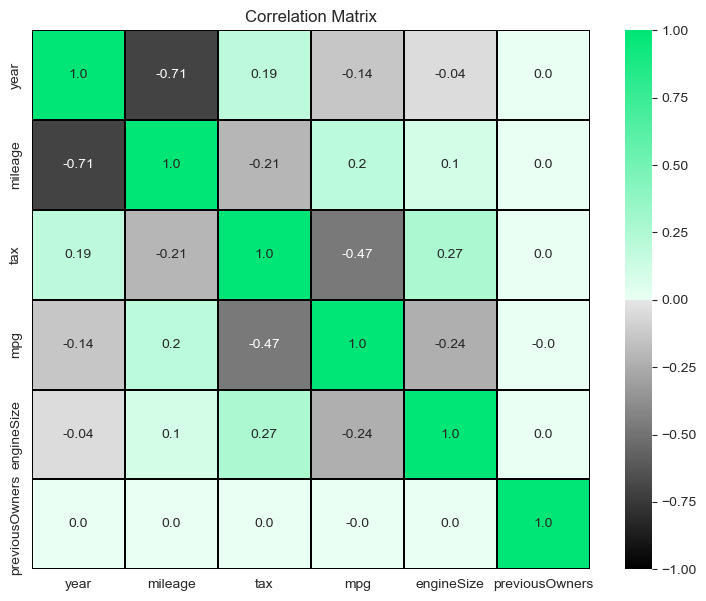

In [277]:
corr_features_pearson = df_train_new[numeric_features].corr(method="pearson").round(2)
print(corr_features_pearson)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr_features_pearson,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

                year  mileage   tax   mpg  engineSize  previousOwners
year            1.00    -0.80  0.32 -0.32       -0.04             0.0
mileage        -0.80     1.00 -0.26  0.33        0.10             0.0
tax             0.32    -0.26  1.00 -0.56        0.16            -0.0
mpg            -0.32     0.33 -0.56  1.00       -0.20             0.0
engineSize     -0.04     0.10  0.16 -0.20        1.00             0.0
previousOwners  0.00     0.00 -0.00  0.00        0.00             1.0


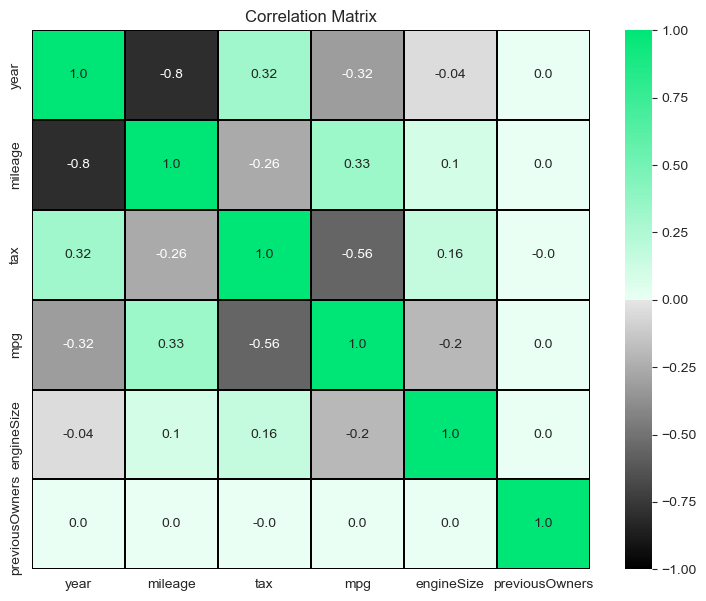

In [278]:
corr_features_spearman = df_train_new[numeric_features].corr(method="spearman").round(2)
print(corr_features_spearman)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr_features_spearman,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

In [279]:
spearman_threshold = 0.15

df_num_with_target = df_train_new[numeric_features + ["price"]]
corr_target_spearman = df_num_with_target.corr(method="spearman")["price"].drop("price")

spearman_selected = corr_target_spearman[ corr_target_spearman.abs() >= spearman_threshold ].index.tolist()
print("Numeric selected by Spearman (|ρ| >= 0.15):", spearman_selected)

Numeric selected by Spearman (|ρ| >= 0.15): ['year', 'mileage', 'tax', 'mpg', 'engineSize']


Given the generally low correlation coefficients obtained from both Pearson and Spearman methods, a threshold ≥ 0.15 was adopted to identify wich features are relevant.

Across both correlation matrices, previousOwners consistently demonstrates the weakest relationship with the other features, suggesting that it contributes little explanatory value and is therefore the least informative feature to retain.

In [280]:
corr_with_target = df_train_new[numeric_features + ["price"]].corr()["price"].sort_values(ascending=False)
corr_with_target

price             1.000000
engineSize        0.619963
year              0.489470
tax               0.301352
previousOwners    0.000508
mpg              -0.330198
mileage          -0.416959
Name: price, dtype: float64

<h3 style="color: #00E676;"> 3.2. Wrapper Methods </h3>

<h4 style="color: #00E676;"> 3.2.1. RFE Feature Selection </h4>

In [281]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [282]:
def build_rfe_pipeline(model, n_numeric_features):
    """
    Cria um pipeline completo com:
      - imputação + scaling + RFE nas features numéricas
      - imputação + OneHotEncoder nas categóricas
      - modelo final no fim
    """
    
    # 1. Pipeline for numeric features
    numeric_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("rfe", RFE(
            estimator=LinearRegression(),
            n_features_to_select=n_numeric_features
        ))
    ])
    
    # 2. Pipeline for categorical features
    categorical_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])
    
    # 3. Combines everything
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_pipeline, numeric_features),
            ("cat", categorical_pipeline, categorical_features)
        ]
    )
    
    # 4. Final Pipeline
    full_pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    return full_pipeline


In [283]:
# number of features we want to test
max_num_features = len(numeric_features)
num_features_list = list(range(1, max_num_features + 1))

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

cv_scores_mae = []

for k in num_features_list:
    print(f"[INFO] Testing RFE with {k} numeric features...")
    
    model = LinearRegression()
    pipe = build_rfe_pipeline(model, n_numeric_features=k)
    
    scores = cross_val_score(pipe, X, y, cv=kf,
                             scoring=mae_scorer, n_jobs=-1)
    
    mean_mae = -scores.mean()
    cv_scores_mae.append(mean_mae)
    print(f"Mean CV MAE: {mean_mae:.2f}\n")


[INFO] Testing RFE with 1 numeric features...
Mean CV MAE: 3933.70

[INFO] Testing RFE with 2 numeric features...
Mean CV MAE: 2692.20

[INFO] Testing RFE with 3 numeric features...
Mean CV MAE: 2523.80

[INFO] Testing RFE with 4 numeric features...
Mean CV MAE: 2503.87

[INFO] Testing RFE with 5 numeric features...
Mean CV MAE: 2494.84

[INFO] Testing RFE with 6 numeric features...
Mean CV MAE: 2494.84



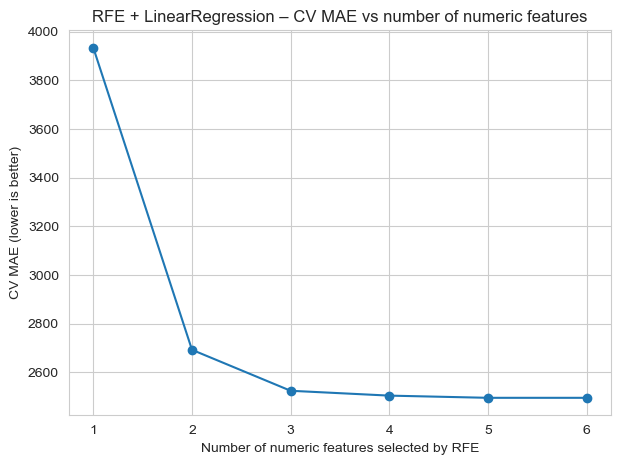

In [284]:
plt.figure(figsize=(7,5))
plt.plot(num_features_list, cv_scores_mae, marker="o")
plt.xlabel("Number of numeric features selected by RFE")
plt.ylabel("CV MAE (lower is better)")
plt.title("RFE + LinearRegression – CV MAE vs number of numeric features")
plt.grid(True)
plt.show()


In [285]:
best_idx = np.argmin(cv_scores_mae)
BEST_NUMERIC_FEATURES = num_features_list[best_idx]

print("======================================")
print(f"Best number of numeric features: {BEST_NUMERIC_FEATURES}")
print(f"Best CV MAE: {cv_scores_mae[best_idx]:.2f}")
print("======================================")

Best number of numeric features: 6
Best CV MAE: 2494.84


The plot reveals the relationship between model complexity and predictive performance. As we add more numeric features selected by RFE, we initially observe a decrease in MAE, indicating improved predictions. However, this improvement doesn't continue indefinitely. In our case, the optimal configuration uses **5 numeric features**, achieving a **MAE of 2469.87**. This subset captures the most predictive information while avoiding the pitfalls of including irrelevant or redundant features. 

In [286]:
def get_selected_numeric_features(n_numeric_features):
    base_model = LinearRegression()
    pipe = build_rfe_pipeline(base_model, n_numeric_features)
    
    pipe.fit(X, y)  # só para interpretação
    
    preproc = pipe.named_steps["preprocess"]
    num_pipeline = preproc.named_transformers_["num"]
    rfe_step = num_pipeline.named_steps["rfe"]
    
    mask = rfe_step.support_
    selected = np.array(numeric_features)[mask]
    
    return selected.tolist()

selected_numeric_features = get_selected_numeric_features(BEST_NUMERIC_FEATURES)

print("Selected numeric features:")
print(selected_numeric_features)


Selected numeric features:
['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']


<h3 style="color: #00E676;">3.3. Final Features to Modeling</h3>

<h4 style="color: #00E676;">3.3.1. Best Numeric Features</h4>

In [287]:
best_numeric_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

<h4 style="color: #00E676;">3.3.2. Best Numeric Features and Engineered Features</h4>

In [288]:
engineered_features = [
    "Age",
    "age_bucket",
    "mileage_age_interaction"
]
num_best_eng_features = best_numeric_features + engineered_features
num_best_eng_features

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'Age',
 'age_bucket',
 'mileage_age_interaction']

<h4 style="color: #00E676;">3.3.3. Best Numeric Features and Categorical Without Model</h4>

In [289]:
categorical_no_model = [
    "Brand_clean",
    "fuelType_clean",
    "transmission_clean"
]
num_cat_features = (best_numeric_features+ categorical_no_model)
num_cat_features

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'Brand_clean',
 'fuelType_clean',
 'transmission_clean']

<h4 style="color: #00E676;">3.3.4. Best Numeric Features, Categorical Without Model and Engineered Features</h4>

In [290]:
best_cat_eng_features = num_cat_features + engineered_features
best_cat_eng_features

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'Brand_clean',
 'fuelType_clean',
 'transmission_clean',
 'Age',
 'age_bucket',
 'mileage_age_interaction']

<h4 style="color: #00E676;">3.3.5. Mileage Age, tax and Categorical Without Model</h4>

In [291]:
cat_mileage_features= ["mileage", "Age", "tax"] + categorical_no_model
cat_mileage_features

['mileage',
 'Age',
 'tax',
 'Brand_clean',
 'fuelType_clean',
 'transmission_clean']

<h2 style="color: #00E676;">4. Predictive Modeling </h2>

In [292]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

<h3 style="color: #00E676;">4.1. Numeric Features </h3>

Testing 4 different models using only the 6 numeric features (year, mileage, tax, mpg, engineSize, previousOwners)

<h4 style="color: #00E676;">4.1.1 Linear Regression </h4>

In [293]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
    selected_features=best_numeric_features
)

Train MAE: 3716.3621
Validation MAE: 3716.6889


<h4 style="color: #00E676;">4.1.2 Decision Tree Regressor </h4>

In [294]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=best_numeric_features
)

Train MAE: 76.3385
Validation MAE: 2630.7247


<h4 style="color: #00E676;">4.1.3. RandomForestRegressor </h4>

In [ ]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=best_numeric_features
)

Train MAE: 834.7417
Validation MAE: 2167.5074


<h4 style="color: #00E676;">4.1.4. KNN </h4>

In [296]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
    selected_features=best_numeric_features
)

Train MAE: 1868.9565
Validation MAE: 2320.5171


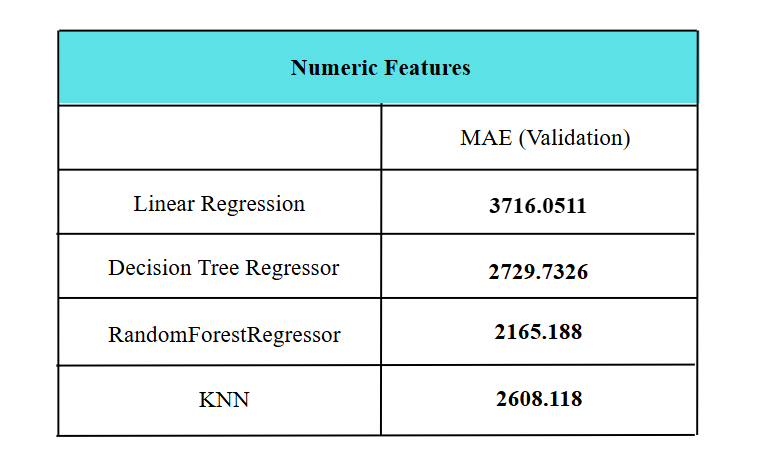

<h3 style="color: #00E676;">4.2. Numeric and Feature Engineering </h3>

Testing same 4 models but now includes engineered features to compare if we notice any type of improvement. Did the feature engineering actually help?

<h4 style="color: #00E676;">4.2.1. Linear Regression </h4>

In [297]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
    selected_features= num_best_eng_features
)

Train MAE: 3602.256
Validation MAE: 3602.8365


<h4 style="color: #00E676;">4.2.2. Decision Tree Regressor </h4>

In [298]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=num_best_eng_features
)

Train MAE: 76.3385
Validation MAE: 2636.7601


<h4 style="color: #00E676;">4.2.3. Random Forest Regressor </h4>

In [ ]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=num_best_eng_features
)

Train MAE: 835.3234
Validation MAE: 2170.2575


<h4 style="color: #00E676;">4.2.4. KNN </h4>

In [300]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
    selected_features=num_best_eng_features
)

Train MAE: 1882.0558
Validation MAE: 2337.3366


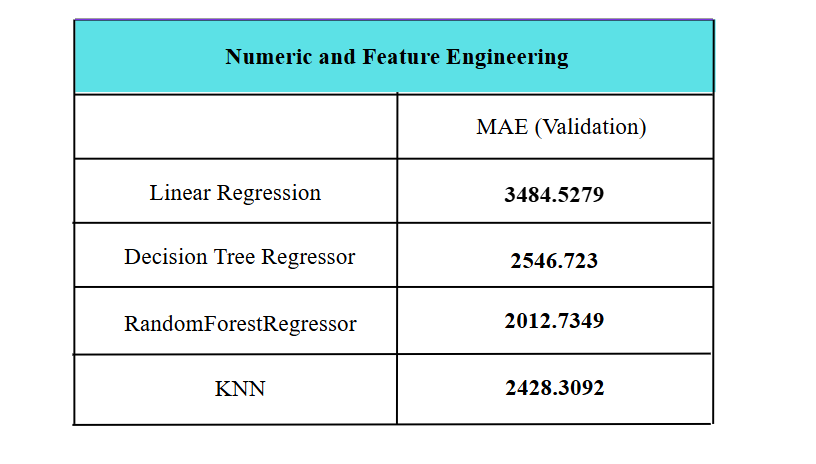

The inclusion of engineered features consistently reduced the validation MAE, demonstrating that feature transformation can extract hidden patterns that raw features alone could not capture. Every single model benefits from feature engineering.

While validation performance improved, the massive discrepancy between training and validation MAE in tree-based models reveals severe overfitting.

<h3 style="color: #00E676;">4.3. Numeric and Categorical Features </h3>

<h4 style="color: #00E676;">4.3.1. Linear Regression </h4>

In [301]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
    selected_features=num_cat_features
)

Train MAE: 3047.0304
Validation MAE: 3048.4904


<h4 style="color: #00E676;">4.3.2. Decision Tree Regressor </h4>

In [302]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=num_cat_features
)

Train MAE: 30.2868
Validation MAE: 1951.4701


<h4 style="color: #00E676;">4.3.3. Random Forest Regressor </h4>

In [ ]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=num_cat_features
)

Train MAE: 586.5773
Validation MAE: 1555.6514


<h4 style="color: #00E676;">4.3.4. KNN </h4>

In [304]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
    selected_features=num_cat_features
)

Train MAE: 1390.1817
Validation MAE: 1737.9426


<h3 style="color: #00E676;">4.4. Numeric, Categorical and Engineered Features </h3>

<h4 style="color: #00E676;">4.4.1. Linear Regression </h4>

In [305]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
    selected_features=best_cat_eng_features
)

Train MAE: 2977.9637
Validation MAE: 2979.5832


<h4 style="color: #00E676;">4.4.2. Decision Tree Regressor </h4>

In [306]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=best_cat_eng_features
)

Train MAE: 30.2868
Validation MAE: 1942.2691


<h4 style="color: #00E676;">4.4.3. Random Forest Regressor </h4>

In [ ]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=best_cat_eng_features
)

Train MAE: 587.6957
Validation MAE: 1559.0774


<h4 style="color: #00E676;">4.4.4. KNN </h4>

In [308]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
    selected_features=best_cat_eng_features
)

Train MAE: 1398.4347
Validation MAE: 1745.1051


<h3 style="color: #00E676;">4.5. Mileage Age, tax and Categorical Without Model </h3>

<h4 style="color: #00E676;">4.5.1. Linear Regression </h4>

In [309]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
    selected_features=cat_mileage_features
)

Train MAE: 3848.0291
Validation MAE: 3848.479


<h4 style="color: #00E676;">4.5.2. Decision Tree Regressor </h4>

In [310]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=cat_mileage_features
)

Train MAE: 304.8463
Validation MAE: 3751.5237


<h4 style="color: #00E676;">4.5.3. Random Forest Regressor </h4>

In [ ]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=cat_mileage_features
)

Train MAE: 1341.4927
Validation MAE: 3212.579


<h4 style="color: #00E676;">4.5.4. KNN </h4>

In [312]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
    selected_features=cat_mileage_features
)

Train MAE: 2615.4265
Validation MAE: 3206.4177


<h3 style="color: #00E676;">4.6. All Features </h3>

Testing the 4 models with numeric features + engineered features + categorical features (brand, model, fuel type, transmission) after one-hot encoding

<h4 style="color: #00E676;">4.6.1. Linear Regression </h4>

In [313]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
)

Train MAE: 2382.5429
Validation MAE: 2396.5965


<h4 style="color: #00E676;">4.6.2. Decision Tree Regressor </h4>

In [314]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
)

Train MAE: 7.7912
Validation MAE: 1757.4306


<h4 style="color: #00E676;">4.6.3. Random Forest Regressor </h4>

In [319]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
)

Train MAE: 511.3007
Validation MAE: 1372.3782


<h4 style="color: #00E676;">4.6.4. KNN </h4>

In [316]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
)

Train MAE: 1324.5304
Validation MAE: 1658.226


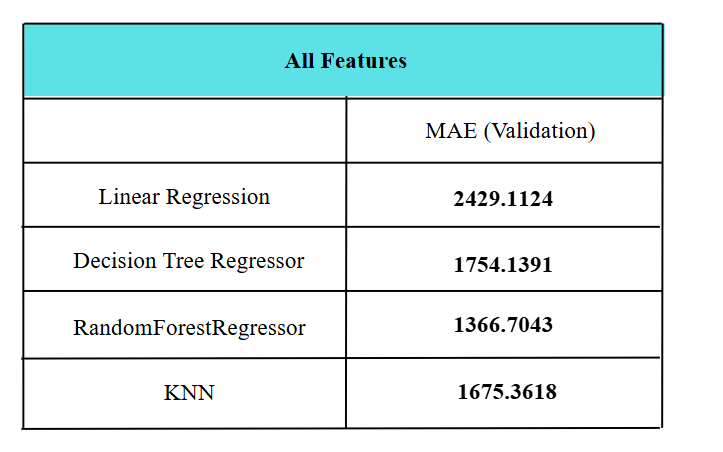

Adding categorical features was absolutely essential - they contain a lot of predictive power for this context. The improvement validates that.

However, with great power comes great complexity. The Trade-off between performance and complexity.
While we achieved good results, we've introduced significant complexity:
Before (Numeric + Engineered): 11 features total
After (All Features with One-Hot Encoding):Potentially 100+ features

We adress this problem next with Top80 RFE

<h2 style="color: #00E676;">5. Predictive Modeling With HyperParaments </h2>

In [317]:
rf_base_train, rf_base_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "n_estimators": 100,
        "random_state": 42,
        "n_jobs": -1
    },
    scaler=None
)

print("Baseline RF:")
print("Train:", np.mean(rf_base_train))
print("Val:", np.mean(rf_base_val))

Train MAE: 511.3007
Validation MAE: 1372.3782
Baseline RF:
Train: 511.3006755769103
Val: 1372.3781519393976


In [318]:
n_estimators_list = [100, 300]
results_n_estimators = {}

for n in n_estimators_list:
    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=RandomForestRegressor,
        model_params={
            "n_estimators": n,
            "random_state": 42,
            "n_jobs": -1
        },
        scaler=None
    )

    results_n_estimators[n] = {
        "train_mean": (np.mean(train_scores)),
        "val_mean": (np.mean(val_scores)),
        "val_std": (np.std(val_scores))
    }

results_n_estimators

Train MAE: 511.3007
Validation MAE: 1372.3782
Train MAE: 506.5375
Validation MAE: 1367.6846


{100: {'train_mean': np.float64(511.3006755769103),
  'val_mean': np.float64(1372.3781519393976),
  'val_std': np.float64(19.322738236160298)},
 300: {'train_mean': np.float64(506.53745621532653),
  'val_mean': np.float64(1367.6845637607846),
  'val_std': np.float64(19.77796608764279)}}

In [100]:
best_n_estimators = 300

In [ ]:
max_features_list = ["sqrt", "log2"]
results_max_features = {}

for mf in max_features_list:
    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=RandomForestRegressor,
        model_params={
            "n_estimators": best_n_estimators,
            "max_features": mf,
            "random_state": 42,
            "n_jobs": -1
        },
        scaler=None
    )

    results_max_features[mf] = {
        "train_mean": np.mean(train_scores),
        "val_mean": np.mean(val_scores),
        "val_std": np.std(val_scores)
    }

results_max_features

Train MAE: 511.2794
Validation MAE: 1373.7822

=== max_features = sqrt ===
train_scores: [509.85597523075415, 511.46923251424664, 511.96526455038565, 514.4043653629632, 508.70196516259534]
val_scores: [1394.9971477077504, 1350.7323006635777, 1376.0428985170627, 1348.132186848812, 1399.0067096854073]
Train MAE: 513.556
Validation MAE: 1379.4805

=== max_features = log2 ===
train_scores: [511.76605024261966, 514.2526326643747, 514.9286022272221, 515.7809341381806, 511.0518315430044]
val_scores: [1400.1260713827594, 1359.151619266915, 1386.932910671986, 1349.7005171698029, 1401.4913528431218]


{'sqrt': {'train_mean': np.float64(511.27936056418895),
  'val_mean': np.float64(1373.782248684522),
  'val_std': np.float64(21.35734855716089)},
 'log2': {'train_mean': np.float64(513.5560101630803),
  'val_mean': np.float64(1379.480494266917),
  'val_std': np.float64(21.29021584978777)}}

In [103]:
best_max_features = "sqrt"

In [104]:
max_depth_list = [None, 15]
results_max_depth = {}

for depth in max_depth_list:
    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=RandomForestRegressor,
        model_params={
            "n_estimators": best_n_estimators,
            "max_features": best_max_features,
            "max_depth": depth,
            "random_state": 42,
            "n_jobs": -1
        },
        scaler=None
    )

    results_max_depth[depth] = {
        "train_mean": np.mean(train_scores),
        "val_mean": np.mean(val_scores),
        "val_std": np.std(val_scores)
    }

results_max_depth


Train MAE: 511.2794
Validation MAE: 1373.7822
Train MAE: 2224.0953
Validation MAE: 2299.5379


{None: {'train_mean': np.float64(511.27936056418895),
  'val_mean': np.float64(1373.782248684522),
  'val_std': np.float64(21.35734855716089)},
 15: {'train_mean': np.float64(2224.095293057662),
  'val_mean': np.float64(2299.5379208407808),
  'val_std': np.float64(32.29917532948611)}}

In [105]:
best_max_depth = None


In [106]:
max_samples_list = [1.0, 0.7]
results_max_samples = {}

for ms in max_samples_list:
    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=RandomForestRegressor,
        model_params={
            "n_estimators": best_n_estimators,
            "max_features": best_max_features,
            "max_depth": best_max_depth,
            "max_samples": ms,
            "bootstrap": True,
            "random_state": 42,
            "n_jobs": -1
        },
        scaler=None
    )

    results_max_samples[ms] = {
        "train_mean": np.mean(train_scores),
        "val_mean": np.mean(val_scores),
        "val_std": np.std(val_scores)
    }

results_max_samples

Train MAE: 511.2794
Validation MAE: 1373.7822
Train MAE: 692.9861
Validation MAE: 1387.8461


{1.0: {'train_mean': np.float64(511.27936056418895),
  'val_mean': np.float64(1373.782248684522),
  'val_std': np.float64(21.35734855716089)},
 0.7: {'train_mean': np.float64(692.9861480872341),
  'val_mean': np.float64(1387.8461478985878),
  'val_std': np.float64(21.950647599801975)}}

In [ ]:
rf_final_params = {
    "n_estimators": 300,
    "max_features": "sqrt",
    "max_depth": None,
    "bootstrap": True,
    "random_state": 42,
    "n_jobs": -1
}

In [109]:
rf_final_model, rf_final_imputers, rf_final_scaler = run_model(
    X,
    y,
    model_class=RandomForestRegressor,
    model_params=rf_final_params,
    scaler=None
)

In [ ]:
X_test = df_test_new.drop(columns=["carID"])

X_test_ready = prepare_test_for_model(
    X_test,
    rf_final_imputers,
    rf_final_scaler
)
y_test_pred = rf_final_model.predict(X_test_ready)
y_test_pred

array([11943.52, 23418.83, 13728.56, ..., 35376.02, 20842.12, 10908.63])

In [119]:
pd.Series(y_test_pred).sort_values(ascending=False).head(10)

3685     127788.73
11236    115070.27
20965    112990.97
21895    104455.17
14896    102145.24
27190     94356.49
2473      92677.62
2130      90844.49
30582     88416.25
25766     85225.55
dtype: float64

In [120]:
submission = pd.DataFrame({
    "carID": df_test_new["carID"],
    "price": y_test_pred
})
submission.to_csv("submission.csv", index=False)

<h2 style="color: #00E676;">4.5. SVR </h2>

In [ ]:
para dar erro

svm_train, svm_val = avg_score(
    kf, X, y,
    model_class=SVR,
    model_params={
        "kernel": "rbf",   # melhor default para regressão
        "C": 1.0,
        "epsilon": 0.2
    },
    scaler=StandardScaler()   # OBRIGATÓRIO para SVM
)


Train MAE: 6314.9695
Validation MAE: 6315.2364

SVM Resultados:
Train MAE médio: 6314.969538241055
Val   MAE médio: 6315.236359077653


Atençaõ, demora entre 2 a 3 a correr e os resultados são terriveis

In [ ]:
df_test_new

,carID,year,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
0,89856,NaN,30700.0,205.0,41.5,1.6,3.0,Hyundai,petrol,automatic,i30
1,106581,2017.0,NaN,150.0,38.2,2.0,2.0,Vw,petrol,semi-auto,tiguan
2,80886,2016.0,36792.0,125.0,51.4,1.5,2.0,Bmw,petrol,automatic,2 series
3,100174,2019.0,5533.0,145.0,44.1,1.2,1.0,Opel,petrol,manual,grandland x
4,81376,2019.0,9058.0,150.0,51.4,2.0,4.0,Bmw,diesel,semi-auto,1 series
...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,2017.0,27575.0,145.0,46.3,1.4,1.0,Vw,petrol,manual,tiguan
32563,81363,2020.0,1980.0,145.0,34.0,2.0,3.0,Bmw,petrol,automatic,x2
32564,76833,2019.0,8297.0,145.0,38.2,2.0,4.0,Audi,diesel,semi-auto,q5
32565,91768,2019.0,NaN,145.0,28.5,1.3,1.0,Mercedes,petrol,manual,a class


<h2 style="color: #00E676;">Neural Network Regressor </h2>

In [158]:
# BASIC
mlp_train_basic, mlp_val_basic = avg_score(
    kf, X, y,
    model_class=MLPRegressor,
    model_params={
        "hidden_layer_sizes": (64, 32),
        "activation": "relu",
        "solver": "adam",
        "max_iter": 150,
        "random_state": 42
    },
    scaler=StandardScaler(),
)

print("MLP BASIC MAE:", np.mean(mlp_val_basic))

c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\env

Train MAE: 1474.9905
Validation MAE: 1557.7478
MLP BASIC MAE: 1557.7478443466428


Basic - com include_advanced=False
Full - com include_advanced = True

In [162]:
# BASIC - 
mlp_train_basic, mlp_val_basic = avg_score(
    kf, X, y,
    model_class=MLPRegressor,
    model_params={
        "hidden_layer_sizes": (64, 32),
        "activation": "relu",
        "solver": "adam",
        "random_state": 42
    },
    scaler=StandardScaler(),
)

# FULL
mlp_train_full, mlp_val_full = avg_score(
    kf, X, y,
    model_class=MLPRegressor,
    model_params={
        "hidden_layer_sizes": (64, 32),
        "activation": "relu",
        "solver": "adam",
        "random_state": 42
    },
    scaler=StandardScaler()
    )

print("MLP BASIC MAE:", np.mean(mlp_val_basic))
print("MLP FULL MAE:", np.mean(mlp_val_full))

c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\env

Train MAE: 1432.7968
Validation MAE: 1533.3264


c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\env

Train MAE: 1432.7968
Validation MAE: 1533.3264
MLP BASIC MAE: 1533.3264420252858
MLP FULL MAE: 1533.3264420252858


Otimização de parâmetros	

In [ ]:
final_mlp_basic, imp_mlp_basic, sc_mlp_basic = run_model(
    X, y,
    model_class=MLPRegressor,
    model_params={
        "hidden_layer_sizes": best_basic,
        "activation": "relu",
        "solver": "adam",
        "max_iter": 800,
        "random_state": 42
    },
    scaler=StandardScaler(),
    include_advanced=False
)

mae_mlp_basic = evaluate_model(
    X, y,
    final_mlp_basic,
    imp_mlp_basic,
    sc_mlp_basic,
    include_advanced=False
)

print("Final BASIC MLP MAE:", mae_mlp_basic)

Modelo final BASIC

In [ ]:
layer_configs = [
    (32,),
    (64, 32),
    (128, 64, 32)
]

best_basic = None
best_mae_basic = float("inf")

best_full = None
best_mae_full = float("inf")

for config in layer_configs:

    # BASIC
    _, val_basic = avg_score(
        kf, X, y,
        model_class=MLPRegressor,
        model_params={
            "hidden_layer_sizes": config,
            "activation": "relu",
            "solver": "adam",
            "max_iter": 600,
            "random_state": 42
        },
        scaler=StandardScaler(),
    )

    # FULL
    _, val_full = avg_score(
        kf, X, y,
        model_class=MLPRegressor,
        model_params={
            "hidden_layer_sizes": config,
            "activation": "relu",
            "solver": "adam",
            "max_iter": 600,
            "random_state": 42
        },
        scaler=StandardScaler(),
        include_advanced=True
    )

    mae_b = np.mean(val_basic)
    mae_f = np.mean(val_full)

    if mae_b < best_mae_basic:
        best_mae_basic = mae_b
        best_basic = config

    if mae_f < best_mae_full:
        best_mae_full = mae_f
        best_full = config

print("Best BASIC layers:", best_basic, "| MAE:", best_mae_basic)
print("Best FULL layers:", best_full, "| MAE:", best_mae_full)


Modelo final FULL

In [ ]:
final_mlp_full, imp_mlp_full, sc_mlp_full = run_model(
    X, y,
    model_class=MLPRegressor,
    model_params={
        "hidden_layer_sizes": best_full,
        "activation": "relu",
        "solver": "adam",
        "max_iter": 800,
        "random_state": 42
    },
    scaler=StandardScaler(),
    include_advanced=True
)

mae_mlp_full = evaluate_model(
    X, y,
    final_mlp_full,
    imp_mlp_full,
    sc_mlp_full,
    include_advanced=True
)

print("Final FULL MLP MAE:", mae_mlp_full)

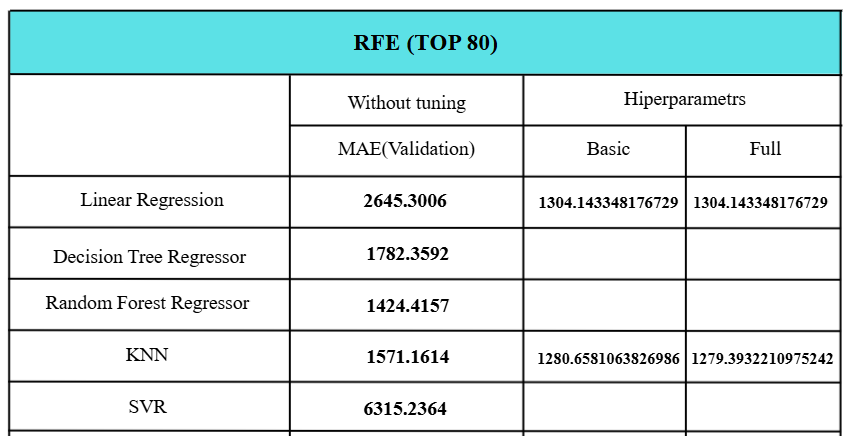

# 4. Open Ended Section?

# 5. Deployment

<h2 style="color: #00E676;">Kaggle Submission </h2>

In [ ]:
final_model, imputers, fitted_scaler = run_model(
    X, y,
    model_class=RandomForestRegressor,
    model_params={
        "n_estimators": 300,
        "random_state": 42,
        "n_jobs": -1
    },
    scaler=None
)

#final_model.predict(df_test_new)

In [ ]:
final_model, imputers, fitted_scaler = run_model(
    X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": best_k},
    scaler=StandardScaler()
)

#final_model.predict(df_test_new)

final_knn_mae = evaluate_model(
    X, y,
    final_knn,
    final_knn_imputers,
    final_knn_scaler
)

print("Model KNN With Hyperparameters::", final_knn_mae)

Model KNN With Hyperparameters:: 1290.431404088402


In [ ]:
test_final = prepare_test_for_model(df_test_new, imputers)

test_preds = final_model.predict(test_final)

submission = pd.DataFrame({
    "CarID": df_test_new["carID"],  
    "price": test_preds           
})
submission.to_csv("submission.csv", index=False)


c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
